# Importing Libraries for Depression Detection 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sb


# Reading Dataset

In [3]:
data = pd.read_csv('EEG.machinelearing_data_BRMH.csv')
data.head()


no. sex   age    eeg.date  education     IQ       main.disorder  \
0    1   M  57.0   2012.8.30        NaN    NaN  Addictive disorder   
1    2   M  37.0    2012.9.6        6.0  120.0  Addictive disorder   
2    3   M  32.0   2012.9.10       16.0  113.0  Addictive disorder   
3    4   M  35.0   2012.10.8       18.0  126.0  Addictive disorder   
4    5   M  36.0  2012.10.18       16.0  112.0  Addictive disorder   

      specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  ...  \
0  Alcohol use disorder         35.998557         21.717375  ...   
1  Alcohol use disorder         13.425118         11.002916  ...   
2  Alcohol use disorder         29.941780         27.544684  ...   
3  Alcohol use disorder         21.496226         21.846832  ...   
4  Alcohol use disorder         37.775667         33.607679  ...   

   COH.F.gamma.o.Pz.p.P4  COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  \
0              55.989192              16.739679              23.452271   
1              45.595619              17.510824              26.777368   
2              99.475453              70.654171              39.131547   
3              59.986561              63.822201              36.478254   
4              61.462720              59.166097              51.465531   

   COH.F.gamma.o.Pz.s.O2  COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  \
0              45.678820              30.167520              16.918761   
1              28.201062              57.108861              32.375401   
2              69.920996              71.063644              38.534505   
3              47.117006              84.658376              24.724096   
4              58.635415              80.685608              62.138436   

   COH.F.gamma.p.P4.s.O2  COH.F.gamma.q.T6.r.O1  COH.F.gamma.q.T6.s.O2  \
0              48.850427               9.422630              34.507082   
1              60.351749              13.900981              57.831848   
2              69.908764              27.180532              64.803155   
3              50.299349              35.319695              79.822944   
4              75.888749              61.003944              87.455509   

   COH.F.gamma.r.O1.s.O2  
0              28.613029  
1              43.463261  
2              31.485799  
3              41.141873  
4              70.531662  

[5 rows x 1149 columns]

<iframe src="https://www.kaggle.com/embed/lazygene/visualising-pre-processed-eeg-data?cellIds=5&kernelSessionId=106172334" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Visualising pre-processed EEG data"></iframe>

# Dataset Analysis

In [4]:

print("Data Shape:",data.shape)

Data Shape: (945, 1149)


# Electrode Positions

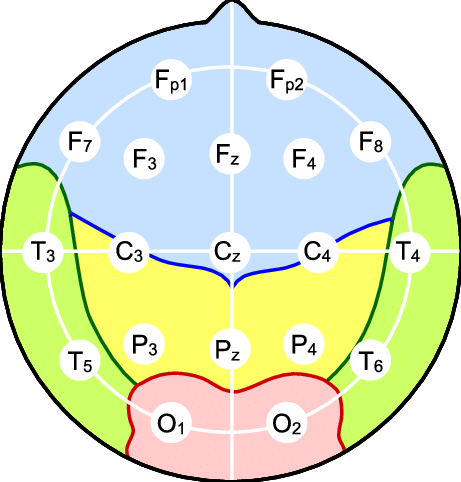

In [5]:
def plot_eeg(levels, positions, axes, fig, ch_names=None, cmap='Spectral_r', cb_pos=(0.9, 0.1),
             cb_width=0.04, cb_height=0.9, marker=None, marker_style=None, vmin=None, vmax=None, **kwargs):
    """
    Function visulises processed EEG data in a simple way. Based on mne.viz.plot_topomap.


    :param levels: numpy.array, shape (n_chan,)
        data values to plot.
    :param positions: numpy.array, shape (n_chan, 2)|instance of mne.Info
        Location information for the data points(/channels). If an array, for each data point,
        the x and y coordinates. If an Info object, it must contain only one data type and exactly
        len(data) data channels, and the x/y coordinates will be inferred from the montage applied
        to the Info object.
    :param axes: matplotlib.axes.Axes
        The axes to plot to.
    :param fig: matplotlib.figure.Figure
        The figure to create colorbar on.
    :param ch_names: list | None
        List of channel names. If None, channel names are not plotted.
    :param cmap: matplotlib colormap | None
        Colormap to use. If None, ‘Reds’ is used for all positive data, otherwise defaults to ‘RdBu_r’.
        Default value is 'Spectral_r'
    :param cb_pos: tuple/list of floats
        Coordinates of color bar
    :param cb_width: float
        Width of colorbar
    :param cb_height: float
        Height of colorbar
    :param marker: numpy.array of bool, shape (n_channels,) | None
        Array indicating channel(s) to highlight with a distinct plotting style.
        Array elements set to True will be plotted with the parameters given in mask_params.
        Defaults to None, equivalent to an array of all False elements.
    :param marker_style: dict | None
        Additional plotting parameters for plotting significant sensors. Default (None) equals:
        dict(marker='o', markerfacecolor='w', markeredgecolor='k', linewidth=0, markersize=4)
    :param vmin, vmax: float | callable() | None
        Lower and upper bounds of the colormap, in the same units as the data.
        If vmin and vmax are both None, they are set at ± the maximum absolute value
        of the data (yielding a colormap with midpoint at 0). If only one of vmin, vmax is None,
        will use min(data) or max(data), respectively. If callable, should accept a NumPy array
        of data and return a float.
    :param kwargs:
        any other parameter used in mne.viz.plot_topomap
    :return im: matplotlib.image.AxesImage
        The interpolated data.
    :return cn: matplotlib.contour.ContourSet
        The fieldlines.
    """
    if 'mask' not in kwargs:
        mask = np.ones(levels.shape[0], dtype='bool')
    else:
        mask = None
    im, cm = mne.viz.plot_topomap(levels, positions, axes=axes, names=ch_names, vmin=vmin, vmax=vmax,
                          cmap=cmap, mask=mask, mask_params=marker_style, show=False, **kwargs)

    cbar_ax = fig.add_axes([cb_pos[0], cb_pos[1], cb_width, cb_height])
    clb = axes.figure.colorbar(im, cax=cbar_ax)
    return im, cm
df=data
# One of the columns contains no data, it separates data
# patient info | abs power of PSD per band per channel | sep_col | functional connectivity data
mis = df.isna().sum()
sep_col = mis[mis == df.shape[0]].index[0]
df = df.loc[:, 'main.disorder':sep_col].drop(sep_col, axis=1)
df

def reformat_name(name):
    '''
    reformat from XX.X.band.x.channel to band.channel
    '''
    band, _, channel = name[5:].split(sep='.')
    return f'{band}.{channel}'
reformat_vect = np.vectorize(reformat_name)
new_colnames = np.concatenate((df.columns[:2],
                              reformat_vect(df.columns[2:])))
df.set_axis(new_colnames, axis=1, inplace=True)
df.columns



# mean powers per main disorder
main_mean = df.groupby('main.disorder').mean().reset_index()
# mean powers per main disorder
spec_mean = df.groupby('specific.disorder').mean().reset_index()
# list of bands
bands = ['delta', 'theta', 'alpha', 'beta', 'highbeta', 'gamma']
# convert from wide to long
main_mean = pd.wide_to_long(main_mean, bands, ['main.disorder'], 'channel', sep='.', suffix='\w+')
spec_mean = pd.wide_to_long(spec_mean, bands, ['specific.disorder'], 'channel', sep='.', suffix='\w+')
main_mean



delta      theta      alpha  \
main.disorder                      channel                                    
Addictive disorder                 FP1      18.831516  13.836983  24.308169   
Anxiety disorder                   FP1      20.212546  12.220164  20.542989   
Healthy control                    FP1      18.383673  11.877841  21.024037   
Mood disorder                      FP1      20.652163  13.594064  23.575915   
Obsessive compulsive disorder      FP1      18.261254  12.469764  24.380553   
...                                               ...        ...        ...   
Healthy control                    O2        9.597102   7.218941  20.192476   
Mood disorder                      O2       13.887099   9.051129  28.289462   
Obsessive compulsive disorder      O2       11.490165   9.438324  31.925618   
Schizophrenia                      O2       14.780898   9.635807  28.995409   
Trauma and stress related disorder O2       13.619173  10.891949  29.133310   

                                                 beta  highbeta     gamma  
main.disorder                      channel                                 
Addictive disorder                 FP1      10.588020  2.041568  2.418517  
Anxiety disorder                   FP1      11.369194  2.362892  2.874982  
Healthy control                    FP1       9.197048  2.055055  2.577345  
Mood disorder                      FP1      12.357410  2.629678  3.292514  
Obsessive compulsive disorder      FP1       9.946188  2.199657  3.096013  
...                                               ...       ...       ...  
Healthy control                    O2       10.277784  1.955759  2.990976  
Mood disorder                      O2       13.643925  2.554539  3.615276  
Obsessive compulsive disorder      O2       11.461414  2.151135  3.304698  
Schizophrenia                      O2       14.521340  2.627968  3.868594  
Trauma and stress related disorder O2       13.356386  2.288945  3.363356  

[133 rows x 6 columns]

# Visualization 

NameError: name 'mne' is not defined

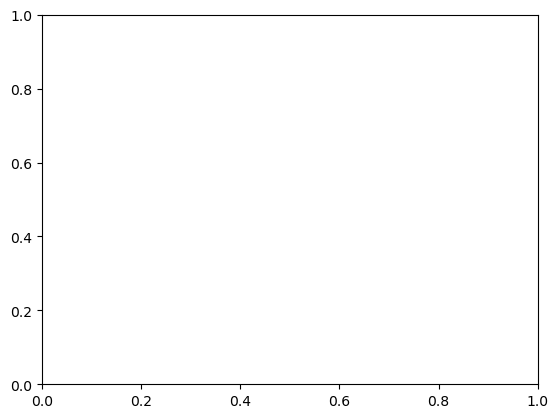

In [8]:

chs = {'FP1': [-0.03, 0.08],
       'FP2': [0.03, 0.08],
       'F7': [-0.073, 0.047],
       'F3': [-0.04, 0.041],
       'Fz': [0, 0.038],
       'F4': [0.04, 0.041],
       'F8': [0.073, 0.047],
       'T3': [-0.085, 0],
       'C3': [-0.045, 0],
       'Cz': [0, 0],
       'C4': [0.045, 0],
       'T4': [0.085, 0],
       'T5': [-0.073, -0.047],
       'P3': [-0.04, -0.041],
       'Pz': [0, -0.038],
       'P4': [0.04, -0.041],
       'T6': [0.07, -0.047],
       'O1': [-0.03, -0.08],
       'O2': [0.03, -0.08]}
channels = pd.DataFrame(chs).transpose()
channels

main_mean.loc['Schizophrenia', 'gamma']
# extract power for one main.disorder and one band
test =  main_mean.loc['Schizophrenia', 'gamma']
# make sure that channels are in correct order
assert (test.index == channels.index).all()
# plot
fig, ax = plt.subplots()

plot_eeg(test, channels.to_numpy(), ax, fig, vmin=0, marker_style={'markersize':4, 'markerfacecolor':'black'})
plt.show()

In [111]:
print("Data Description: \n")
data.describe()

Data Description: 



AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  AB.A.delta.d.F3  \
count        945.000000        945.000000       945.000000       945.000000   
mean          20.182936         21.177584        17.749553        18.901698   
std           11.282022         12.230662        10.003598         9.079482   
min            3.272260          3.244199         3.050507         3.412618   
25%           12.784872         13.019269        11.134327        12.460586   
50%           17.065286         17.838251        15.541469        16.733004   
75%           24.492760         25.654394        21.623961        23.347900   
max           92.826192        101.515687        91.373456        82.544167   

       AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  AB.A.delta.h.T3  \
count       945.000000       945.000000       945.000000       945.000000   
mean         20.447079        19.490329        17.042218        11.790176   
std           9.742912         9.252500         9.272096         7.347929   
min           5.066593         4.048931         2.552213         2.128977   
25%          13.548645        12.637717        10.381770         7.042545   
50%          18.065276        17.432568        15.050377        10.044354   
75%          25.573096        23.956748        20.810308        14.246874   
max         101.566662        77.197502        69.071230        77.283412   

       AB.A.delta.i.C3  AB.A.delta.j.Cz  ...  COH.F.gamma.o.Pz.p.P4  \
count       945.000000       945.000000  ...             945.000000   
mean         16.405732        19.566879  ...              75.889633   
std           8.246200         9.525142  ...              15.861641   
min           2.213470         3.149313  ...              12.611954   
25%          10.686639        13.130418  ...              68.014443   
50%          14.525494        17.245633  ...              78.647712   
75%          20.271380        23.792159  ...              87.398387   
max          65.932521        88.474026  ...              99.678649   

       COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  COH.F.gamma.o.Pz.s.O2  \
count             945.000000             945.000000             945.000000   
mean               55.049113              56.959796              60.739169   
std                19.541956              18.326785              18.052887   
min                 0.519048               6.926792               0.708008   
25%                41.607506              43.682444              48.374883   
50%                55.158858              56.657348              61.257972   
75%                69.740640              70.649245              73.979100   
max               100.000000              99.307895             100.000000   

       COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  COH.F.gamma.p.P4.s.O2  \
count             945.000000             945.000000             945.000000   
mean               69.829254              47.862489              66.832798   
std                17.725321              19.685722              17.028701   
min                 2.421748               0.036664               1.032207   
25%                58.937785              32.581046              55.872070   
50%                72.298636              45.719426              68.238375   
75%                83.066877              62.081839              79.192418   
max                99.581629              98.720067              99.650154   

       COH.F.gamma.q.T6.r.O1  COH.F.gamma.q.T6.s.O2  COH.F.gamma.r.O1.s.O2  
count             945.000000             945.000000             945.000000  
mean               39.301406              66.153213              57.056207  
std                20.790933              18.088548              19.600107  
min                 1.228502               0.363268               3.988805  
25%                22.049743              54.710605              43.955229  
50%                36.549938              67.988937              57.515871  
75%             

In [112]:
data.isnull().sum()

specific_disorder        0
AB.A.delta.a.FP1         0
AB.A.delta.b.FP2         0
AB.A.delta.c.F7          0
AB.A.delta.d.F3          0
                        ..
COH.F.gamma.p.P4.r.O1    0
COH.F.gamma.p.P4.s.O2    0
COH.F.gamma.q.T6.r.O1    0
COH.F.gamma.q.T6.s.O2    0
COH.F.gamma.r.O1.s.O2    0
Length: 1141, dtype: int64

In [7]:
# data.education.isnull().sum()

In [8]:
data

no. sex   age    eeg.date  education     IQ       main.disorder  \
0      1   M  57.0   2012.8.30        NaN    NaN  Addictive disorder   
1      2   M  37.0    2012.9.6        6.0  120.0  Addictive disorder   
2      3   M  32.0   2012.9.10       16.0  113.0  Addictive disorder   
3      4   M  35.0   2012.10.8       18.0  126.0  Addictive disorder   
4      5   M  36.0  2012.10.18       16.0  112.0  Addictive disorder   
..   ...  ..   ...         ...        ...    ...                 ...   
940  941   M  22.0   2014.8.28       13.0  116.0     Healthy control   
941  942   M  26.0   2014.9.19       13.0  118.0     Healthy control   
942  943   M  26.0   2014.9.27       16.0  113.0     Healthy control   
943  944   M  24.0   2014.9.20       13.0  107.0     Healthy control   
944  945   M  21.0  2015.10.23       13.0  105.0     Healthy control   

        specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  ...  \
0    Alcohol use disorder         35.998557         21.717375  ...   
1    Alcohol use disorder         13.425118         11.002916  ...   
2    Alcohol use disorder         29.941780         27.544684  ...   
3    Alcohol use disorder         21.496226         21.846832  ...   
4    Alcohol use disorder         37.775667         33.607679  ...   
..                    ...               ...               ...  ...   
940       Healthy control         41.851823         36.771496  ...   
941       Healthy control         18.986856         19.401387  ...   
942       Healthy control         28.781317         32.369230  ...   
943       Healthy control         19.929100         25.196375  ...   
944       Healthy control         65.195346         69.241972  ...   

     COH.F.gamma.o.Pz.p.P4  COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  \
0                55.989192              16.739679              23.452271   
1                45.595619              17.510824              26.777368   
2                99.475453              70.654171              39.131547   
3                59.986561              63.822201              36.478254   
4                61.462720              59.166097              51.465531   
..                     ...                    ...                    ...   
940              82.905657              34.850706              63.970519   
941              65.917918              66.700117              44.756285   
942              61.040959              27.632209              45.552852   
943              99.113664              48.328934              41.248470   
944              78.600293              68.255430              70.687410   

     COH.F.gamma.o.Pz.s.O2  COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  \
0                45.678820              30.167520              16.918761   
1                28.201062              57.108861              32.375401   
2                69.920996              71.063644              38.534505   
3                47.117006              84.658376              24.724096   
4                58.635415              80.685608              62.138436   
..                     ...                    ...                    ...   
940              63.982003              51.244725              62.203684   
941              49.787513              98.905995              54.021304   
942              33.638817              46.690983              19.382928   
943              28.192238              48.665743              42.007147   
944              74.433908              74.294750              53.254681   

     COH.F.gamma.p.P4.s.O2  COH.F.gamma.q.T6.r.O1  COH.F.gamma.q.T6.s.O2  \
0                48.850427               9.422630              34.507082   
1                60.351749              13.900981              57.831848   
2                69.908764              27.180532              64.803155   
3                50.299349              35.319695              79.822944   
4                75.888749              61.003944              87.455509   
..               

# **Deleting Unnecessary Features**

In [9]:
data.drop(["no.","main.disorder","sex","main.disorder", "age", "eeg.date","education", "IQ", "Unnamed: 122"], axis=1, inplace =True)
data.head()

specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
0  Alcohol use disorder         35.998557         21.717375        21.518280   
1  Alcohol use disorder         13.425118         11.002916        11.942516   
2  Alcohol use disorder         29.941780         27.544684        17.150159   
3  Alcohol use disorder         21.496226         21.846832        17.364316   
4  Alcohol use disorder         37.775667         33.607679        21.865556   

   AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
0        26.825048        26.611516        25.732649        16.563408   
1        15.272216        14.151570        12.456034         8.436832   
2        23.608960        27.087811        13.541237        16.523963   
3        13.833701        14.100954        13.100939        14.613650   
4        21.771413        22.854536        21.456377        15.969042   

   AB.A.delta.h.T3  AB.A.delta.i.C3  ...  COH.F.gamma.o.Pz.p.P4  \
0        29.891368        22.402246  ...              55.989192   
1         9.975238        14.834740  ...              45.595619   
2        12.775574        21.686306  ...              99.475453   
3         8.063191        11.015078  ...              59.986561   
4         9.434306        15.244523  ...              61.462720   

   COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  COH.F.gamma.o.Pz.s.O2  \
0              16.739679              23.452271              45.678820   
1              17.510824              26.777368              28.201062   
2              70.654171              39.131547              69.920996   
3              63.822201              36.478254              47.117006   
4              59.166097              51.465531              58.635415   

   COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  COH.F.gamma.p.P4.s.O2  \
0              30.167520              16.918761              48.850427   
1              57.108861              32.375401              60.351749   
2              71.063644              38.534505              69.908764   
3              84.658376              24.724096              50.299349   
4              80.685608              62.138436              75.888749   

   COH.F.gamma.q.T6.r.O1  COH.F.gamma.q.T6.s.O2  COH.F.gamma.r.O1.s.O2  
0               9.422630              34.507082              28.613029  
1              13.900981              57.831848              43.463261  
2              27.180532              64.803155              31.485799  
3              35.319695              79.822944              41.141873  
4              61.003944              87.455509              70.531662  

[5 rows x 1141 columns]

In [10]:
data.columns

Index(['specific.disorder', 'AB.A.delta.a.FP1', 'AB.A.delta.b.FP2',
       'AB.A.delta.c.F7', 'AB.A.delta.d.F3', 'AB.A.delta.e.Fz',
       'AB.A.delta.f.F4', 'AB.A.delta.g.F8', 'AB.A.delta.h.T3',
       'AB.A.delta.i.C3',
       ...
       'COH.F.gamma.o.Pz.p.P4', 'COH.F.gamma.o.Pz.q.T6',
       'COH.F.gamma.o.Pz.r.O1', 'COH.F.gamma.o.Pz.s.O2',
       'COH.F.gamma.p.P4.q.T6', 'COH.F.gamma.p.P4.r.O1',
       'COH.F.gamma.p.P4.s.O2', 'COH.F.gamma.q.T6.r.O1',
       'COH.F.gamma.q.T6.s.O2', 'COH.F.gamma.r.O1.s.O2'],
      dtype='object', length=1141)

In [11]:
data.isnull().sum()

specific.disorder        0
AB.A.delta.a.FP1         0
AB.A.delta.b.FP2         0
AB.A.delta.c.F7          0
AB.A.delta.d.F3          0
                        ..
COH.F.gamma.p.P4.r.O1    0
COH.F.gamma.p.P4.s.O2    0
COH.F.gamma.q.T6.r.O1    0
COH.F.gamma.q.T6.s.O2    0
COH.F.gamma.r.O1.s.O2    0
Length: 1141, dtype: int64

# **Dataset Preprocessing**

In [12]:

#data.rename(columns={"main.disorder":"main_disorder"}, inplace = True)
data.rename(columns={"specific.disorder":"specific_disorder"}, inplace = True)
data.head()

specific_disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
0  Alcohol use disorder         35.998557         21.717375        21.518280   
1  Alcohol use disorder         13.425118         11.002916        11.942516   
2  Alcohol use disorder         29.941780         27.544684        17.150159   
3  Alcohol use disorder         21.496226         21.846832        17.364316   
4  Alcohol use disorder         37.775667         33.607679        21.865556   

   AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
0        26.825048        26.611516        25.732649        16.563408   
1        15.272216        14.151570        12.456034         8.436832   
2        23.608960        27.087811        13.541237        16.523963   
3        13.833701        14.100954        13.100939        14.613650   
4        21.771413        22.854536        21.456377        15.969042   

   AB.A.delta.h.T3  AB.A.delta.i.C3  ...  COH.F.gamma.o.Pz.p.P4  \
0        29.891368        22.402246  ...              55.989192   
1         9.975238        14.834740  ...              45.595619   
2        12.775574        21.686306  ...              99.475453   
3         8.063191        11.015078  ...              59.986561   
4         9.434306        15.244523  ...              61.462720   

   COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  COH.F.gamma.o.Pz.s.O2  \
0              16.739679              23.452271              45.678820   
1              17.510824              26.777368              28.201062   
2              70.654171              39.131547              69.920996   
3              63.822201              36.478254              47.117006   
4              59.166097              51.465531              58.635415   

   COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  COH.F.gamma.p.P4.s.O2  \
0              30.167520              16.918761              48.850427   
1              57.108861              32.375401              60.351749   
2              71.063644              38.534505              69.908764   
3              84.658376              24.724096              50.299349   
4              80.685608              62.138436              75.888749   

   COH.F.gamma.q.T6.r.O1  COH.F.gamma.q.T6.s.O2  COH.F.gamma.r.O1.s.O2  
0               9.422630              34.507082              28.613029  
1              13.900981              57.831848              43.463261  
2              27.180532              64.803155              31.485799  
3              35.319695              79.822944              41.141873  
4              61.003944              87.455509              70.531662  

[5 rows x 1141 columns]

In [13]:
features_with_null=list(data.columns[data.isna().any()])
len(features_with_null)

0

In [14]:
features_with_null

[]

In [15]:
# main_disorders = list(data.main_disorder.unique())
# main_disorders

In [16]:
specific_disoders = list(data.specific_disorder.unique())
specific_disoders

['Alcohol use disorder',
 'Acute stress disorder',
 'Depressive disorder',
 'Healthy control',
 'Behavioral addiction disorder',
 'Obsessive compulsitve disorder',
 'Schizophrenia',
 'Panic disorder',
 'Social anxiety disorder',
 'Posttraumatic stress disorder',
 'Adjustment disorder',
 'Bipolar disorder']

# Taking the two class: Depressive and Healthy

In [17]:
#mood_data = data[(data['main_disorder'] == 'Mood disorder')or(data['main_disorder']=='Healthy control')]
mood_data=data[data['specific_disorder'].isin(['Depressive disorder', 'Healthy control'])]
#mood_data=data[data']
#mood_data=data.isin({'num_wings': [0, 3]})
mood_data


specific_disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
89   Depressive disorder         12.159137         13.113503         9.031007   
90   Depressive disorder         12.404484          9.737819        13.925651   
91   Depressive disorder         16.573145         15.586708        14.094928   
92   Depressive disorder         26.650019         22.823161        17.942133   
93   Depressive disorder         14.624474         14.277301        11.099375   
..                   ...               ...               ...              ...   
940      Healthy control         41.851823         36.771496        43.671792   
941      Healthy control         18.986856         19.401387        27.586436   
942      Healthy control         28.781317         32.369230        11.717778   
943      Healthy control         19.929100         25.196375        14.445391   
944      Healthy control         65.195346         69.241972        35.361363   

     AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
89         14.879389        15.834830        19.595759        11.605911   
90         12.325169        15.130696        10.292518        10.263299   
91         12.660197        12.979617        10.611797         8.802664   
92         17.148214        15.338128        14.571966         7.983127   
93         16.047926        17.851932        17.165379        11.682990   
..               ...              ...              ...              ...   
940        36.860889        24.732236        23.607823        23.288260   
941        20.194732        19.407491        20.216570        16.465027   
942        23.134370        26.209302        25.484497        22.586688   
943        16.453456        16.590649        16.007279        18.909188   
944        28.089348        35.475808        36.804968        69.071230   

     AB.A.delta.h.T3  AB.A.delta.i.C3  ...  COH.F.gamma.o.Pz.p.P4  \
89          6.084709        13.159062  ...              65.408894   
90         11.451697        10.243151  ...              84.366954   
91          7.509552         9.903838  ...              62.681353   
92         28.158009        12.027862  ...              86.582363   
93          6.193040        11.650681  ...              85.309981   
..               ...              ...  ...                    ...   
940         7.520642        17.636528  ...              82.905657   
941        13.178851        12.687296  ...              65.917918   
942        11.368466        21.799254  ...              61.040959   
943        13.438102        17.442777  ...              99.113664   
944         6.905352        22.623165  ...              78.600293   

     COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  COH.F.gamma.o.Pz.s.O2  \
89               59.590594              77.310851              75.280467   
90               53.402639              60.535899              73.838548   
91               20.062716              36.041763              36.436509   
92               83.045735              85.752150              85.875624   
93               58.218838              61.211830              65.038486   
..                     ...                    ...                    ...   
940              34.850706              63.970519              63.982003   
941              66.700117              44.756285              49.787513   
942              27.632209              45.552852              33.638817   
943              48.328934              41.248470              28.192238   
944              68.255430              70.687410              74.433908   

     COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  COH.F.gamma.p.P4.s.O2  \
89               57.311188              48.015594              59.579033   
90               72.298636              43.330485              71.298037   
91               47.491240              20.875426              53.747615   
92               86.286859              79.520327              84.541455   
93         

In [18]:
print(mood_data['specific_disorder'].value_counts())

Depressive disorder    199
Healthy control         95
Name: specific_disorder, dtype: int64


In [19]:
print(mood_data['specific_disorder'].value_counts())

Depressive disorder    199
Healthy control         95
Name: specific_disorder, dtype: int64


In [20]:
specific_mood_disoders = list(mood_data.specific_disorder.unique())
specific_mood_disoders

['Depressive disorder', 'Healthy control']

# Encoding


In [21]:
#from sklearn.preprocessing import LabelEncoder, StandardScaler

#label_encoder=LabelEncoder()
#mood_data['specific_disorder'] = label_encoder.fit_transform(mood_data['specific_disorder'])
mood_data['specific_disorder'] = mood_data['specific_disorder'].replace({"Depressive disorder":1,"Healthy control":0})
# mood_data['specific_disorder'].unique()

C:\Users\USER\AppData\Local\Temp\ipykernel_14004\2904134320.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mood_data['specific_disorder'] = mood_data['specific_disorder'].replace({"Depressive disorder":1,"Healthy control":0})


In [22]:
features=["specific_disorder"]

In [23]:
features

['specific_disorder']

In [24]:
mood_data

specific_disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
89                   1         12.159137         13.113503         9.031007   
90                   1         12.404484          9.737819        13.925651   
91                   1         16.573145         15.586708        14.094928   
92                   1         26.650019         22.823161        17.942133   
93                   1         14.624474         14.277301        11.099375   
..                 ...               ...               ...              ...   
940                  0         41.851823         36.771496        43.671792   
941                  0         18.986856         19.401387        27.586436   
942                  0         28.781317         32.369230        11.717778   
943                  0         19.929100         25.196375        14.445391   
944                  0         65.195346         69.241972        35.361363   

     AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
89         14.879389        15.834830        19.595759        11.605911   
90         12.325169        15.130696        10.292518        10.263299   
91         12.660197        12.979617        10.611797         8.802664   
92         17.148214        15.338128        14.571966         7.983127   
93         16.047926        17.851932        17.165379        11.682990   
..               ...              ...              ...              ...   
940        36.860889        24.732236        23.607823        23.288260   
941        20.194732        19.407491        20.216570        16.465027   
942        23.134370        26.209302        25.484497        22.586688   
943        16.453456        16.590649        16.007279        18.909188   
944        28.089348        35.475808        36.804968        69.071230   

     AB.A.delta.h.T3  AB.A.delta.i.C3  ...  COH.F.gamma.o.Pz.p.P4  \
89          6.084709        13.159062  ...              65.408894   
90         11.451697        10.243151  ...              84.366954   
91          7.509552         9.903838  ...              62.681353   
92         28.158009        12.027862  ...              86.582363   
93          6.193040        11.650681  ...              85.309981   
..               ...              ...  ...                    ...   
940         7.520642        17.636528  ...              82.905657   
941        13.178851        12.687296  ...              65.917918   
942        11.368466        21.799254  ...              61.040959   
943        13.438102        17.442777  ...              99.113664   
944         6.905352        22.623165  ...              78.600293   

     COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  COH.F.gamma.o.Pz.s.O2  \
89               59.590594              77.310851              75.280467   
90               53.402639              60.535899              73.838548   
91               20.062716              36.041763              36.436509   
92               83.045735              85.752150              85.875624   
93               58.218838              61.211830              65.038486   
..                     ...                    ...                    ...   
940              34.850706              63.970519              63.982003   
941              66.700117              44.756285              49.787513   
942              27.632209              45.552852              33.638817   
943              48.328934              41.248470              28.192238   
944              68.255430              70.687410              74.433908   

     COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  COH.F.gamma.p.P4.s.O2  \
89               57.311188              48.015594              59.579033   
90               72.298636              43.330485              71.298037   
91               47.491240              20.875426              53.747615   
92               86.286859              79.520327              84.541455   
93               76.899037       

In [25]:
print(mood_data['specific_disorder'].value_counts())

1    199
0     95
Name: specific_disorder, dtype: int64


# Dropping constant features

In [26]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(mood_data)
var_thres.get_support()
#data.columns[var_thres.get_support()]
# constant_columns = [column for column in data.columns
#                     if column not in data.columns[var_thres.get_support()]]

# print(len(constant_columns))


array([ True,  True,  True, ...,  True,  True,  True])

In [27]:
# #Preprocessing
# cls_0=data[data['specific_disorder']==0]
# cls_1=data[data['specific_disorder']==1]
# len(cls_1)
# cls_1=cls_1.sample(199,replace=True)
# data=pd.concat([cls_0,cls_1],axis=0)
# data.info()
# for x in data.columns:
#     data[x]=(data[x]-data[x].min())/(data[x].max()-data[x].min())
# data.head()


In [28]:
print(mood_data['specific_disorder'].value_counts())

1    199
0     95
Name: specific_disorder, dtype: int64


# **Standardization**

In [29]:

# # Target:
# y = mood_data['specific_disorder']
# #specify:
# scaller = StandardScaler()
# X = scaller.fit_transform(features).

In [30]:
print(mood_data['specific_disorder'].value_counts())

1    199
0     95
Name: specific_disorder, dtype: int64


In [31]:
features=mood_data.to_numpy()
features

array([[ 1.      , 12.159137, 13.113503, ..., 68.50392 , 82.885151,
        86.986191],
       [ 1.      , 12.404484,  9.737819, ..., 23.109295, 62.098128,
        67.749204],
       [ 1.      , 16.573145, 15.586708, ...,  8.009907, 50.202188,
        33.647889],
       ...,
       [ 0.      , 28.781317, 32.36923 , ...,  7.045821, 41.962451,
        19.092111],
       [ 0.      , 19.9291  , 25.196375, ..., 27.1765  , 27.529522,
        20.028446],
       [ 0.      , 65.195346, 69.241972, ..., 47.810386, 80.166825,
        64.380273]])

In [32]:
# # # Target:
# y = specific_disoders_encoding
# # #specify:
# X = preprocessing.StandardScaler().fit_transform(features)

# **Different Frequency Features**

In [33]:
delta_cols = [col for col in mood_data.columns if 'delta' in col]
beta_cols = [col for col in mood_data.columns if 'beta' in col]
theta_cols = [col for col in mood_data.columns if 'theta' in col]
alpha_cols = [col for col in mood_data.columns if 'alpha' in col]

print(f"Number of Delta Columns : {len(delta_cols)}")
print(f"Number of Beta Columns : {len(beta_cols)}")
print(f"Number of Theta Columns : {len(theta_cols)}")
print(f"Number of Alpha Columns : {len(alpha_cols)}")

Number of Delta Columns : 190
Number of Beta Columns : 380
Number of Theta Columns : 190
Number of Alpha Columns : 190


In [34]:
temp_features = delta_cols + beta_cols +theta_cols + alpha_cols
print(f"Number of items in temp_features : {len(temp_features)}")

Number of items in temp_features : 950


In [35]:
# req_features = mood_data[temp_features].to_numpy()
# # the target
# y = specific_disoders_encoding
# #the features
# X = preprocessing.StandardScaler().fit_transform(req_features)

In [36]:
mood_data

specific_disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
89                   1         12.159137         13.113503         9.031007   
90                   1         12.404484          9.737819        13.925651   
91                   1         16.573145         15.586708        14.094928   
92                   1         26.650019         22.823161        17.942133   
93                   1         14.624474         14.277301        11.099375   
..                 ...               ...               ...              ...   
940                  0         41.851823         36.771496        43.671792   
941                  0         18.986856         19.401387        27.586436   
942                  0         28.781317         32.369230        11.717778   
943                  0         19.929100         25.196375        14.445391   
944                  0         65.195346         69.241972        35.361363   

     AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
89         14.879389        15.834830        19.595759        11.605911   
90         12.325169        15.130696        10.292518        10.263299   
91         12.660197        12.979617        10.611797         8.802664   
92         17.148214        15.338128        14.571966         7.983127   
93         16.047926        17.851932        17.165379        11.682990   
..               ...              ...              ...              ...   
940        36.860889        24.732236        23.607823        23.288260   
941        20.194732        19.407491        20.216570        16.465027   
942        23.134370        26.209302        25.484497        22.586688   
943        16.453456        16.590649        16.007279        18.909188   
944        28.089348        35.475808        36.804968        69.071230   

     AB.A.delta.h.T3  AB.A.delta.i.C3  ...  COH.F.gamma.o.Pz.p.P4  \
89          6.084709        13.159062  ...              65.408894   
90         11.451697        10.243151  ...              84.366954   
91          7.509552         9.903838  ...              62.681353   
92         28.158009        12.027862  ...              86.582363   
93          6.193040        11.650681  ...              85.309981   
..               ...              ...  ...                    ...   
940         7.520642        17.636528  ...              82.905657   
941        13.178851        12.687296  ...              65.917918   
942        11.368466        21.799254  ...              61.040959   
943        13.438102        17.442777  ...              99.113664   
944         6.905352        22.623165  ...              78.600293   

     COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  COH.F.gamma.o.Pz.s.O2  \
89               59.590594              77.310851              75.280467   
90               53.402639              60.535899              73.838548   
91               20.062716              36.041763              36.436509   
92               83.045735              85.752150              85.875624   
93               58.218838              61.211830              65.038486   
..                     ...                    ...                    ...   
940              34.850706              63.970519              63.982003   
941              66.700117              44.756285              49.787513   
942              27.632209              45.552852              33.638817   
943              48.328934              41.248470              28.192238   
944              68.255430              70.687410              74.433908   

     COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  COH.F.gamma.p.P4.s.O2  \
89               57.311188              48.015594              59.579033   
90               72.298636              43.330485              71.298037   
91               47.491240              20.875426              53.747615   
92               86.286859              79.520327              84.541455   
93               76.899037       

# Dealing With Missing Values

In [37]:
mood_data.isnull().sum()

mood_data.isna().any()
#Check for missing values in each column
columns_with_missing_values = mood_data.isnull().any()

#Get the list of columns with missing values
columns_list = columns_with_missing_values[columns_with_missing_values].index.tolist()

#Print the columns with missing values
print(columns_list)


[]


In [38]:
# 'Unnamed: 122' in mood_data.columns.values.tolist()

In [39]:
#unNamed=mood_data['Unnamed: 122']

In [40]:
#unNamed.i

In [41]:
# mood_data.drop(['Unnamed: 122'], axis=1, inplace =True)

In [42]:
mood_data

specific_disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
89                   1         12.159137         13.113503         9.031007   
90                   1         12.404484          9.737819        13.925651   
91                   1         16.573145         15.586708        14.094928   
92                   1         26.650019         22.823161        17.942133   
93                   1         14.624474         14.277301        11.099375   
..                 ...               ...               ...              ...   
940                  0         41.851823         36.771496        43.671792   
941                  0         18.986856         19.401387        27.586436   
942                  0         28.781317         32.369230        11.717778   
943                  0         19.929100         25.196375        14.445391   
944                  0         65.195346         69.241972        35.361363   

     AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
89         14.879389        15.834830        19.595759        11.605911   
90         12.325169        15.130696        10.292518        10.263299   
91         12.660197        12.979617        10.611797         8.802664   
92         17.148214        15.338128        14.571966         7.983127   
93         16.047926        17.851932        17.165379        11.682990   
..               ...              ...              ...              ...   
940        36.860889        24.732236        23.607823        23.288260   
941        20.194732        19.407491        20.216570        16.465027   
942        23.134370        26.209302        25.484497        22.586688   
943        16.453456        16.590649        16.007279        18.909188   
944        28.089348        35.475808        36.804968        69.071230   

     AB.A.delta.h.T3  AB.A.delta.i.C3  ...  COH.F.gamma.o.Pz.p.P4  \
89          6.084709        13.159062  ...              65.408894   
90         11.451697        10.243151  ...              84.366954   
91          7.509552         9.903838  ...              62.681353   
92         28.158009        12.027862  ...              86.582363   
93          6.193040        11.650681  ...              85.309981   
..               ...              ...  ...                    ...   
940         7.520642        17.636528  ...              82.905657   
941        13.178851        12.687296  ...              65.917918   
942        11.368466        21.799254  ...              61.040959   
943        13.438102        17.442777  ...              99.113664   
944         6.905352        22.623165  ...              78.600293   

     COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  COH.F.gamma.o.Pz.s.O2  \
89               59.590594              77.310851              75.280467   
90               53.402639              60.535899              73.838548   
91               20.062716              36.041763              36.436509   
92               83.045735              85.752150              85.875624   
93               58.218838              61.211830              65.038486   
..                     ...                    ...                    ...   
940              34.850706              63.970519              63.982003   
941              66.700117              44.756285              49.787513   
942              27.632209              45.552852              33.638817   
943              48.328934              41.248470              28.192238   
944              68.255430              70.687410              74.433908   

     COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  COH.F.gamma.p.P4.s.O2  \
89               57.311188              48.015594              59.579033   
90               72.298636              43.330485              71.298037   
91               47.491240              20.875426              53.747615   
92               86.286859              79.520327              84.541455   
93               76.899037       

# **MinMax Scaling**

In [43]:
# import category_encoders as ce
# encoder = ce.LeaveOneOutEncoder(return_df=True)
# X_train_loo = encoder.fit_transform(X_train, y_train)
# X_test_loo = encoder.transform(X_test)
# X_train_loo.shape
# #organizing Data( to remove error for SVM)
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train_loo, y_train)

In [44]:
# 1 -> Depressed
# 0 -> Healthy

In [45]:
print(mood_data['specific_disorder'].value_counts())

1    199
0     95
Name: specific_disorder, dtype: int64


# equalize data and Normalization

In [46]:
# #Preprocessing
cls_0=mood_data[mood_data['specific_disorder']==0]
cls_1=mood_data[mood_data['specific_disorder']==1]
len(cls_1)
cls_0=cls_0.sample(200,replace=True)
cls_1=cls_1.sample(200,replace=True)
mood_data=pd.concat([cls_1,cls_0],axis=0)
mood_data.info()
for x in mood_data.columns:
    mood_data[x]=(mood_data[x]-mood_data[x].min())/(mood_data[x].max()-mood_data[x].min())
mood_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 812 to 115
Columns: 1141 entries, specific_disorder to COH.F.gamma.r.O1.s.O2
dtypes: float64(1140), int64(1)
memory usage: 3.5 MB


specific_disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
812                1.0          0.340643          0.337218         0.273702   
445                1.0          0.227092          0.316404         0.311548   
591                1.0          0.254277          0.211027         0.297204   
752                1.0          0.204388          0.189761         0.398205   
286                1.0          0.207969          0.177570         0.243340   

     AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
812         0.381463         0.440581         0.412871         0.354683   
445         0.105915         0.093402         0.117574         0.273135   
591         0.188087         0.178599         0.184732         0.246916   
752         0.237001         0.248942         0.232402         0.307159   
286         0.253812         0.290344         0.217137         0.194715   

     AB.A.delta.h.T3  AB.A.delta.i.C3  ...  COH.F.gamma.o.Pz.p.P4  \
812         0.131521         0.373240  ...               0.568341   
445         0.120003         0.115252  ...               0.673944   
591         0.239389         0.208918  ...               0.786371   
752         0.391283         0.322763  ...               0.735933   
286         0.231885         0.389730  ...               0.604540   

     COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  COH.F.gamma.o.Pz.s.O2  \
812               0.321561               0.346040               0.490885   
445               0.382419               0.235510               0.522745   
591               0.410140               0.475122               0.574127   
752               0.550251               0.360548               0.547090   
286               0.259396               0.662337               0.432487   

     COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  COH.F.gamma.p.P4.s.O2  \
812               0.544913               0.222405               0.532844   
445               0.614297               0.191268               0.633480   
591               0.680707               0.375361               0.680562   
752               0.784670               0.193105               0.739753   
286               0.496777               0.367756               0.644681   

     COH.F.gamma.q.T6.r.O1  COH.F.gamma.q.T6.s.O2  COH.F.gamma.r.O1.s.O2  
812               0.192876               0.623939               0.450185  
445               0.142437               0.578555               0.473173  
591               0.237862               0.654102               0.553967  
752               0.101483               0.786789               0.110772  
286               0.159822               0.404949               0.306438  

[5 rows x 1141 columns]

In [47]:
print(mood_data['specific_disorder'].value_counts())

1.0    200
0.0    200
Name: specific_disorder, dtype: int64


In [48]:
#Shuffling the dataset
mood_data=mood_data.sample(frac=1).reset_index()


mood_data.drop(['index'], axis=1, inplace =True)
mood_data

specific_disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
0                  1.0          0.227092          0.316404         0.311548   
1                  1.0          0.075339          0.076522         0.165320   
2                  0.0          0.227224          0.214344         0.410816   
3                  1.0          0.296536          0.283432         0.283361   
4                  1.0          0.227092          0.316404         0.311548   
..                 ...               ...               ...              ...   
395                1.0          0.201244          0.204206         0.149857   
396                0.0          0.174145          0.175790         0.217321   
397                0.0          0.094382          0.074775         0.094353   
398                1.0          0.118200          0.112097         0.181698   
399                1.0          0.124932          0.176626         0.129478   

     AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
0           0.105915         0.093402         0.117574         0.273135   
1           0.128727         0.088069         0.109744         0.138936   
2           0.255120         0.222749         0.248759         0.254013   
3           0.246866         0.243225         0.266337         0.331438   
4           0.105915         0.093402         0.117574         0.273135   
..               ...              ...              ...              ...   
395         0.241642         0.264373         0.348712         0.302323   
396         0.390465         0.323089         0.229457         0.296250   
397         0.133483         0.169138         0.128490         0.079339   
398         0.111267         0.073731         0.090499         0.161468   
399         0.228908         0.189830         0.249137         0.198094   

     AB.A.delta.h.T3  AB.A.delta.i.C3  ...  COH.F.gamma.o.Pz.p.P4  \
0           0.120003         0.115252  ...               0.673944   
1           0.071078         0.159606  ...               0.953269   
2           0.279535         0.195270  ...               0.585833   
3           0.408980         0.294801  ...               0.487481   
4           0.120003         0.115252  ...               0.673944   
..               ...              ...  ...                    ...   
395         0.209409         0.208096  ...               0.741560   
396         0.090412         0.238734  ...               0.962411   
397         0.080385         0.184672  ...               0.875092   
398         0.111046         0.220392  ...               0.755043   
399         0.141795         0.344574  ...               0.546898   

     COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  COH.F.gamma.o.Pz.s.O2  \
0                 0.382419               0.235510               0.522745   
1                 0.857761               0.837097               0.863882   
2                 0.669133               0.401682               0.496638   
3                 0.453656               0.504003               0.866254   
4                 0.382419               0.235510               0.522745   
..                     ...                    ...                    ...   
395               0.656564               0.517852               0.449994   
396               0.750351               0.748795               0.955639   
397               0.854387               0.889105               0.912728   
398               0.594160               0.583685               0.793030   
399               0.603905               0.613757               0.597744   

     COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  COH.F.gamma.p.P4.s.O2  \
0                 0.614297               0.191268               0.633480   
1                 0.892357               0.813669               0.870301   
2                 0.993011               0.538865               0.944422   
3                 0.286535               0.303775               0.734796   
4                 0.614297       

In [49]:
mood_data

specific_disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
0                  1.0          0.227092          0.316404         0.311548   
1                  1.0          0.075339          0.076522         0.165320   
2                  0.0          0.227224          0.214344         0.410816   
3                  1.0          0.296536          0.283432         0.283361   
4                  1.0          0.227092          0.316404         0.311548   
..                 ...               ...               ...              ...   
395                1.0          0.201244          0.204206         0.149857   
396                0.0          0.174145          0.175790         0.217321   
397                0.0          0.094382          0.074775         0.094353   
398                1.0          0.118200          0.112097         0.181698   
399                1.0          0.124932          0.176626         0.129478   

     AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
0           0.105915         0.093402         0.117574         0.273135   
1           0.128727         0.088069         0.109744         0.138936   
2           0.255120         0.222749         0.248759         0.254013   
3           0.246866         0.243225         0.266337         0.331438   
4           0.105915         0.093402         0.117574         0.273135   
..               ...              ...              ...              ...   
395         0.241642         0.264373         0.348712         0.302323   
396         0.390465         0.323089         0.229457         0.296250   
397         0.133483         0.169138         0.128490         0.079339   
398         0.111267         0.073731         0.090499         0.161468   
399         0.228908         0.189830         0.249137         0.198094   

     AB.A.delta.h.T3  AB.A.delta.i.C3  ...  COH.F.gamma.o.Pz.p.P4  \
0           0.120003         0.115252  ...               0.673944   
1           0.071078         0.159606  ...               0.953269   
2           0.279535         0.195270  ...               0.585833   
3           0.408980         0.294801  ...               0.487481   
4           0.120003         0.115252  ...               0.673944   
..               ...              ...  ...                    ...   
395         0.209409         0.208096  ...               0.741560   
396         0.090412         0.238734  ...               0.962411   
397         0.080385         0.184672  ...               0.875092   
398         0.111046         0.220392  ...               0.755043   
399         0.141795         0.344574  ...               0.546898   

     COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  COH.F.gamma.o.Pz.s.O2  \
0                 0.382419               0.235510               0.522745   
1                 0.857761               0.837097               0.863882   
2                 0.669133               0.401682               0.496638   
3                 0.453656               0.504003               0.866254   
4                 0.382419               0.235510               0.522745   
..                     ...                    ...                    ...   
395               0.656564               0.517852               0.449994   
396               0.750351               0.748795               0.955639   
397               0.854387               0.889105               0.912728   
398               0.594160               0.583685               0.793030   
399               0.603905               0.613757               0.597744   

     COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  COH.F.gamma.p.P4.s.O2  \
0                 0.614297               0.191268               0.633480   
1                 0.892357               0.813669               0.870301   
2                 0.993011               0.538865               0.944422   
3                 0.286535               0.303775               0.734796   
4                 0.614297       

# Exporting CSV

In [50]:
#mood_data.to_csv('Preprocessed_data.csv', index= False)

# Outlier Dealing with Standard deviation

In [51]:
all_features=mood_data.columns

In [52]:
for feature in all_features:
    upper_limit = mood_data[feature].mean() + 3*mood_data[feature].std()
    lower_limit = mood_data[feature].mean() - 3*mood_data[feature].std()
#     print("Upper limit of ",feature, upper_limit)
#     print("Lower limit of ",feature, lower_limit)
    mood_data[feature] = np.where(
    mood_data[feature] > upper_limit,
    upper_limit,
    np.where(
        mood_data[feature] < lower_limit,
        lower_limit,
        mood_data[feature]
        )
    )


# Splitting


# **Depressed & Healthy**

In [53]:
depressed=mood_data[mood_data['specific_disorder']==1]
healthy=mood_data[mood_data['specific_disorder'].isin([0])]

In [54]:
train_depressed = depressed.sample(frac=0.80)
train_healthy=healthy.sample(frac=0.80)

In [55]:
train_all=pd.concat([train_depressed,train_healthy])
#train_all
test_all=mood_data[~mood_data.isin(train_all)].dropna(how = 'all')
#test_all

In [56]:
test_depressed=test_all[test_all['specific_disorder']==0]
test_healthy=test_all[test_all['specific_disorder']==1]
y_train=train_all['specific_disorder']
x_train=train_all.loc[:, train_all.columns != 'specific_disorder']

y_test=train_all['specific_disorder']
x_test=train_all.loc[:, train_all.columns != 'specific_disorder']

# Removing Highly correlated Features

<AxesSubplot:>

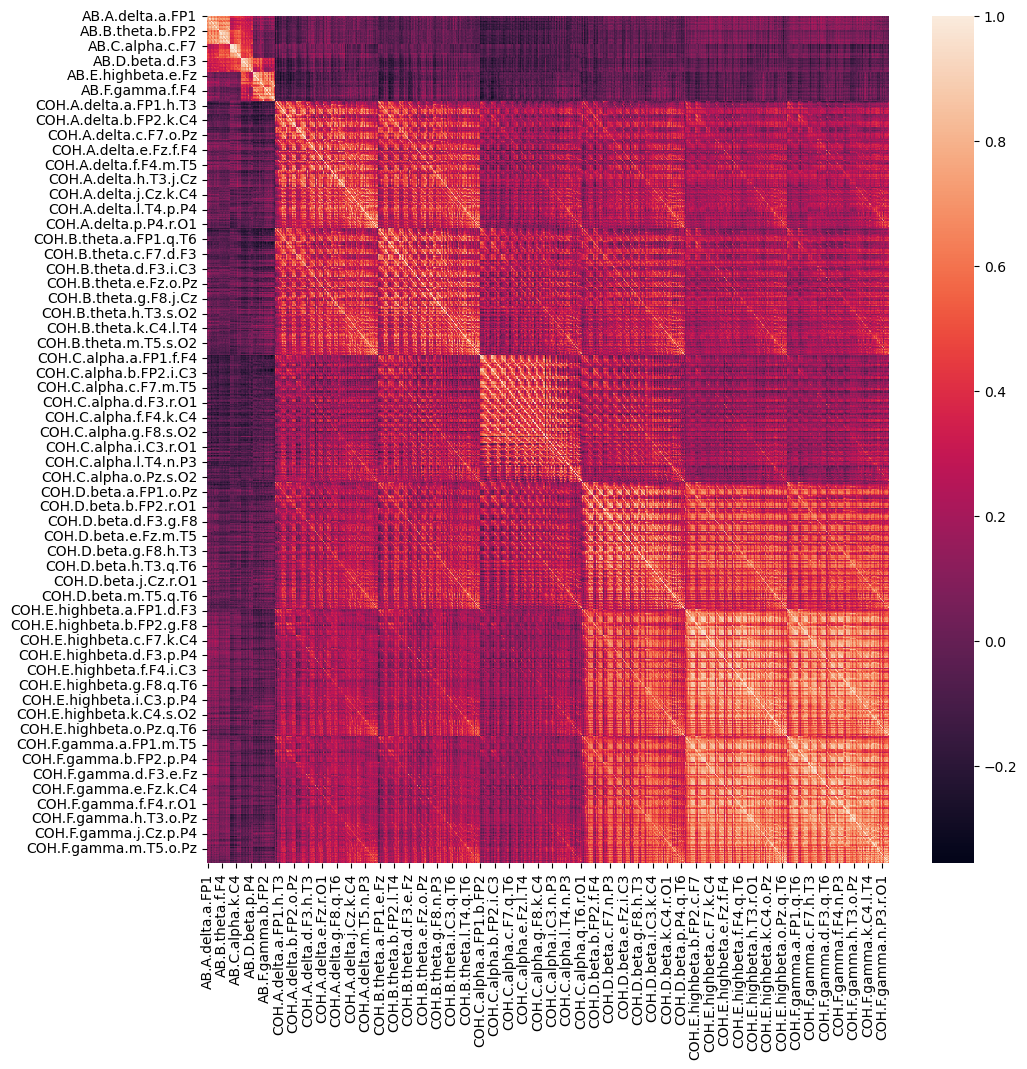

In [57]:
import seaborn as sns
#Using Pearson Correlation
corrmat = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [58]:
# # with the following function we can select highly correlated features
# # it will remove the first feature that is correlated with anything other feature

# def correlation(dataset, threshold):
#     col_corr = set()  # Set of all the names of correlated columns
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
#                 colname = corr_matrix.columns[i]  # getting the name of column
#                 col_corr.add(colname)
#     return col_corr

# corr_features = correlation(x_train, 0.70)
# len(set(corr_features))
# x_train=x_train.drop(corr_features,axis=1)
# x_test=x_test.drop(corr_features,axis=1)
# #mood_data.drop(corr_features,axis=1)

In [59]:
x_train

AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  AB.A.delta.d.F3  \
379          0.198755          0.171960         0.150881         0.131444   
1            0.075339          0.076522         0.165320         0.128727   
24           0.375872          0.407384         0.445330         0.495411   
39           0.643476          0.616620         0.303332         0.299639   
101          0.178482          0.215460         0.245590         0.209401   
..                ...               ...              ...              ...   
86           0.075515          0.066840         0.085025         0.109235   
298          0.272996          0.258081         0.271770         0.380806   
16           0.240849          0.291221         0.190789         0.198245   
332          0.622247          0.585508         0.681952         0.640073   
19           0.131479          0.121148         0.090594         0.103298   

     AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  AB.A.delta.h.T3  \
379         0.066539         0.081815         0.125695         0.251669   
1           0.088069         0.109744         0.138936         0.071078   
24          0.598502         0.544483         0.464707         0.342635   
39          0.296991         0.283675         0.288517         0.138550   
101         0.179505         0.231154         0.222950         0.209554   
..               ...              ...              ...              ...   
86          0.050267         0.040905         0.075974         0.070473   
298         0.407347         0.367125         0.316335         0.272261   
16          0.178997         0.183994         0.298637         0.286093   
332         0.601128         0.578690         0.466885         0.689208   
19          0.112566         0.105015         0.117459         0.077320   

     AB.A.delta.i.C3  AB.A.delta.j.Cz  ...  COH.F.gamma.o.Pz.p.P4  \
379         0.213369         0.182343  ...               0.133136   
1           0.159606         0.155065  ...               0.953269   
24          0.425532         0.518343  ...               0.887692   
39          0.232925         0.268960  ...               0.697513   
101         0.238088         0.308979  ...               0.738502   
..               ...              ...  ...                    ...   
86          0.063534         0.066008  ...               0.710739   
298         0.421264         0.455153  ...               0.497531   
16          0.283930         0.268443  ...               0.994842   
332         0.755623         0.806528  ...               0.894733   
19          0.111897         0.128021  ...               0.254766   

     COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  COH.F.gamma.o.Pz.s.O2  \
379               0.185808               0.034687               0.186311   
1                 0.857761               0.837097               0.863882   
24                0.776082               0.755635               0.760330   
39                0.513692               0.397100               0.489194   
101               0.370707               0.419509               0.573750   
..                     ...                    ...                    ...   
86                0.577669               0.519208               0.555038   
298               0.463964               0.521539               0.501597   
16                0.483389               0.361453               0.271195   
332               0.829771               0.941992               0.897087   
19                0.292387               0.242031               0.363108   

     COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  COH.F.gamma.p.P4.s.O2  \
379               0.294372               0.084985               0.276608   
1                 0.892357               0.813669               0.870301   
24                0.882607               0.696929               0.796057   
39                0.708557               0.319904               0.543639   
101               0.451238               0.388758        

In [60]:
# mood_data.drop(corr_features,axis=1)
# mood_data.drop(['index'], axis=1, inplace =True)
# mood_data.to_csv('afterRemovedHighlyCorreletedData.csv', index= False)

<AxesSubplot:>

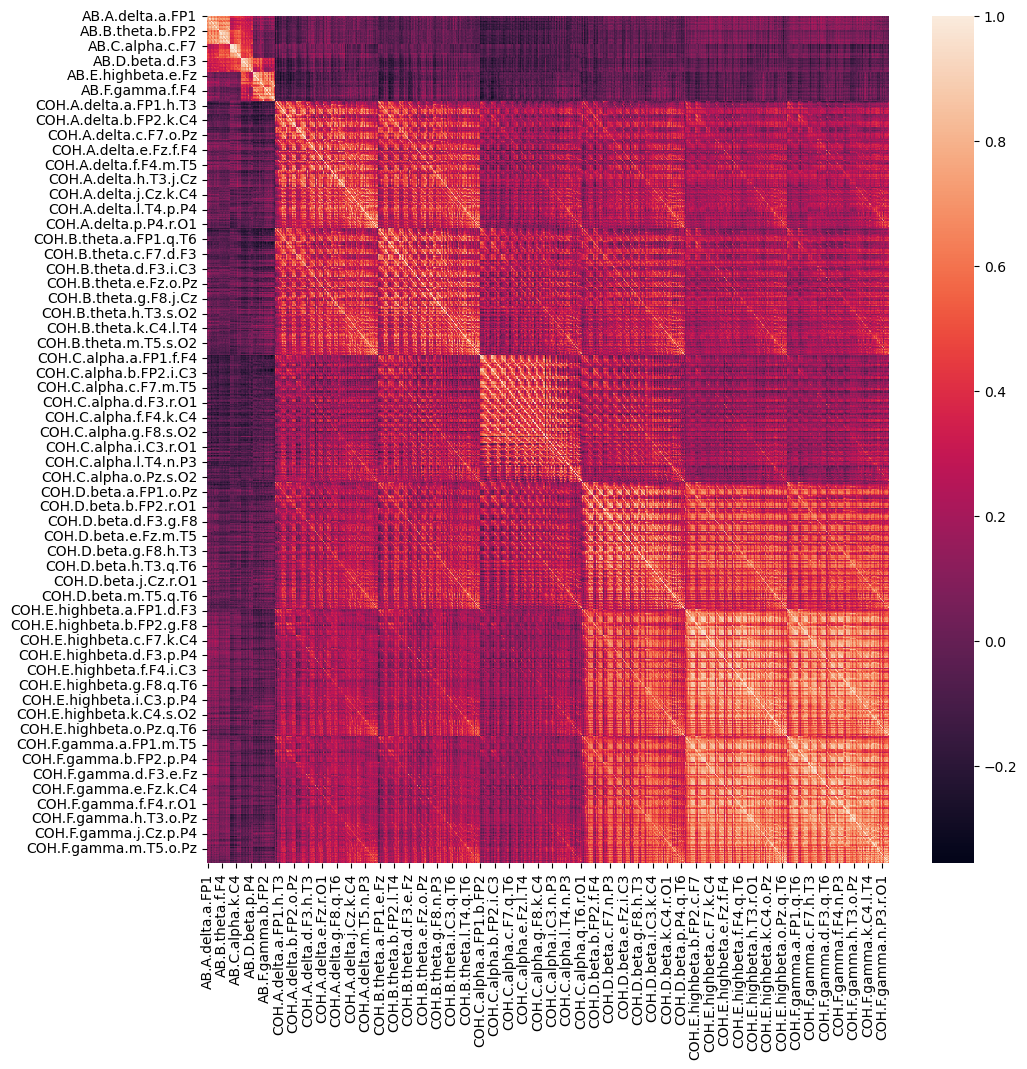

In [61]:
#Heatmap after reducing feature
import seaborn as sns
#Using Pearson Correlation
corrmat = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [62]:
x_train

AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  AB.A.delta.d.F3  \
379          0.198755          0.171960         0.150881         0.131444   
1            0.075339          0.076522         0.165320         0.128727   
24           0.375872          0.407384         0.445330         0.495411   
39           0.643476          0.616620         0.303332         0.299639   
101          0.178482          0.215460         0.245590         0.209401   
..                ...               ...              ...              ...   
86           0.075515          0.066840         0.085025         0.109235   
298          0.272996          0.258081         0.271770         0.380806   
16           0.240849          0.291221         0.190789         0.198245   
332          0.622247          0.585508         0.681952         0.640073   
19           0.131479          0.121148         0.090594         0.103298   

     AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  AB.A.delta.h.T3  \
379         0.066539         0.081815         0.125695         0.251669   
1           0.088069         0.109744         0.138936         0.071078   
24          0.598502         0.544483         0.464707         0.342635   
39          0.296991         0.283675         0.288517         0.138550   
101         0.179505         0.231154         0.222950         0.209554   
..               ...              ...              ...              ...   
86          0.050267         0.040905         0.075974         0.070473   
298         0.407347         0.367125         0.316335         0.272261   
16          0.178997         0.183994         0.298637         0.286093   
332         0.601128         0.578690         0.466885         0.689208   
19          0.112566         0.105015         0.117459         0.077320   

     AB.A.delta.i.C3  AB.A.delta.j.Cz  ...  COH.F.gamma.o.Pz.p.P4  \
379         0.213369         0.182343  ...               0.133136   
1           0.159606         0.155065  ...               0.953269   
24          0.425532         0.518343  ...               0.887692   
39          0.232925         0.268960  ...               0.697513   
101         0.238088         0.308979  ...               0.738502   
..               ...              ...  ...                    ...   
86          0.063534         0.066008  ...               0.710739   
298         0.421264         0.455153  ...               0.497531   
16          0.283930         0.268443  ...               0.994842   
332         0.755623         0.806528  ...               0.894733   
19          0.111897         0.128021  ...               0.254766   

     COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  COH.F.gamma.o.Pz.s.O2  \
379               0.185808               0.034687               0.186311   
1                 0.857761               0.837097               0.863882   
24                0.776082               0.755635               0.760330   
39                0.513692               0.397100               0.489194   
101               0.370707               0.419509               0.573750   
..                     ...                    ...                    ...   
86                0.577669               0.519208               0.555038   
298               0.463964               0.521539               0.501597   
16                0.483389               0.361453               0.271195   
332               0.829771               0.941992               0.897087   
19                0.292387               0.242031               0.363108   

     COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  COH.F.gamma.p.P4.s.O2  \
379               0.294372               0.084985               0.276608   
1                 0.892357               0.813669               0.870301   
24                0.882607               0.696929               0.796057   
39                0.708557               0.319904               0.543639   
101               0.451238               0.388758        

In [63]:
# from collections import Counter
# def z_score_method (df,n,features):
#     """
#     Takes a dataframe df of features and returns an index list corresponding to the observations 
#     containing more than n outliers according to the z-score method.
#     """
#     outlier_list = []
    
#     for column in features:
#         # calculate the mean and standard deviation of the data frame
#         data_mean = df[column].mean()
#         data_std = df[column].std()
#         threshold = 3
        
#         z_score = abs( (df[column] - data_mean)/data_std )
        
#         # Determining a list of indices of outliers for feature column        
#         outlier_list_column =  df[z_score > threshold].index
        
#         # appending the found outlier indices for column to the list of outlier indices 
#         outlier_list.extend(outlier_list_column)
        
#     # selecting observations containing more than x outliers
#     outlier_list = Counter(outlier_list)        
#     multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
#     # Calculate the number of outlier records
#     df1 = df[z_score > threshold]
#     print('Total number of outliers is:', df1.shape[0])
    
#     return multiple_outliers

In [64]:
# # detecting outliers
# Outliers_z_score = z_score_method(x_train,1,x_train.columns)

# # dropping outliers
# x_train = x_train.drop(Outliers_z_score, axis = 0).reset_index(drop=True)

In [65]:
x_train

AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  AB.A.delta.d.F3  \
379          0.198755          0.171960         0.150881         0.131444   
1            0.075339          0.076522         0.165320         0.128727   
24           0.375872          0.407384         0.445330         0.495411   
39           0.643476          0.616620         0.303332         0.299639   
101          0.178482          0.215460         0.245590         0.209401   
..                ...               ...              ...              ...   
86           0.075515          0.066840         0.085025         0.109235   
298          0.272996          0.258081         0.271770         0.380806   
16           0.240849          0.291221         0.190789         0.198245   
332          0.622247          0.585508         0.681952         0.640073   
19           0.131479          0.121148         0.090594         0.103298   

     AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  AB.A.delta.h.T3  \
379         0.066539         0.081815         0.125695         0.251669   
1           0.088069         0.109744         0.138936         0.071078   
24          0.598502         0.544483         0.464707         0.342635   
39          0.296991         0.283675         0.288517         0.138550   
101         0.179505         0.231154         0.222950         0.209554   
..               ...              ...              ...              ...   
86          0.050267         0.040905         0.075974         0.070473   
298         0.407347         0.367125         0.316335         0.272261   
16          0.178997         0.183994         0.298637         0.286093   
332         0.601128         0.578690         0.466885         0.689208   
19          0.112566         0.105015         0.117459         0.077320   

     AB.A.delta.i.C3  AB.A.delta.j.Cz  ...  COH.F.gamma.o.Pz.p.P4  \
379         0.213369         0.182343  ...               0.133136   
1           0.159606         0.155065  ...               0.953269   
24          0.425532         0.518343  ...               0.887692   
39          0.232925         0.268960  ...               0.697513   
101         0.238088         0.308979  ...               0.738502   
..               ...              ...  ...                    ...   
86          0.063534         0.066008  ...               0.710739   
298         0.421264         0.455153  ...               0.497531   
16          0.283930         0.268443  ...               0.994842   
332         0.755623         0.806528  ...               0.894733   
19          0.111897         0.128021  ...               0.254766   

     COH.F.gamma.o.Pz.q.T6  COH.F.gamma.o.Pz.r.O1  COH.F.gamma.o.Pz.s.O2  \
379               0.185808               0.034687               0.186311   
1                 0.857761               0.837097               0.863882   
24                0.776082               0.755635               0.760330   
39                0.513692               0.397100               0.489194   
101               0.370707               0.419509               0.573750   
..                     ...                    ...                    ...   
86                0.577669               0.519208               0.555038   
298               0.463964               0.521539               0.501597   
16                0.483389               0.361453               0.271195   
332               0.829771               0.941992               0.897087   
19                0.292387               0.242031               0.363108   

     COH.F.gamma.p.P4.q.T6  COH.F.gamma.p.P4.r.O1  COH.F.gamma.p.P4.s.O2  \
379               0.294372               0.084985               0.276608   
1                 0.892357               0.813669               0.870301   
24                0.882607               0.696929               0.796057   
39                0.708557               0.319904               0.543639   
101               0.451238               0.388758        

# Forward Feature Selection

In [66]:
# from sklearn.ensemble import ExtraTreesClassifier
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# # Build EXC classifier to use in feature selection

# clf = ExtraTreesClassifier(n_estimators=2, n_jobs=-1,random_state=42)

# # Build step forward feature selection
# sfs1 = sfs(clf,
#            k_features=20,
#            forward=True,
#            floating=False,
#            verbose=2,
#            scoring='accuracy',
#            cv=0)

# # Perform SFFS
# sfs1 = sfs1.fit(x_train, y_train)
# #help(sfs)
# # Which features?
# feat_cols = list(sfs1.k_feature_idx_)
# print(feat_cols)

In [67]:
# x_train.iloc[:, :20]
# x_test.iloc[:,:20]

In [68]:
# # step forward feature selection

# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from sklearn.ensemble import RandomForestRegressor
# sfs1 = SFS(RandomForestRegressor(), 
#            k_features=15, 
#            forward=True, 
#            floating=False, 
#            verbose=2,
#            scoring='r2',
#            cv=3)

# sfs1 = sfs1.fit(np.array(x_train), y_train)
# sfs1.k_feature_idx_ 
# #X_train.columns[list(sfs1.k_feature_idx_)]

In [69]:
#   x_train.columns[list(sfs1.k_feature_idx_)]

In [70]:
# with 80% correlated elimination, 10 feature in forward feature selection. (SVM accuracy : 75)
best_features80p_10f=['AB.D.beta.a.FP1', 'AB.D.beta.l.T4', 'AB.E.highbeta.l.T4',
       'AB.E.highbeta.s.O2', 'COH.A.delta.c.F7.m.T5', 'COH.A.delta.d.F3.f.F4',
       'COH.A.delta.f.F4.i.C3', 'COH.B.theta.a.FP1.m.T5',
       'COH.D.beta.a.FP1.m.T5', 'COH.E.highbeta.f.F4.j.Cz']
best_features70p_15f=['AB.C.alpha.a.FP1', 'COH.A.delta.c.F7.d.F3', 'COH.A.delta.c.F7.h.T3',
       'COH.A.delta.d.F3.e.Fz', 'COH.C.alpha.a.FP1.h.T3',
       'COH.C.alpha.a.FP1.i.C3', 'COH.C.alpha.a.FP1.q.T6',
       'COH.C.alpha.a.FP1.r.O1', 'COH.C.alpha.h.T3.m.T5',
       'COH.D.beta.a.FP1.c.F7', 'COH.D.beta.a.FP1.h.T3',
       'COH.D.beta.a.FP1.i.C3', 'COH.D.beta.a.FP1.k.C4',
       'COH.D.beta.a.FP1.m.T5', 'COH.D.beta.h.T3.m.T5']  #(SVM accuracy : 87.5)
best_features70p_10f=['AB.A.delta.a.FP1', 'AB.C.alpha.a.FP1', 'AB.D.beta.a.FP1',
       'COH.A.delta.d.F3.e.Fz', 'COH.A.delta.e.Fz.f.F4',
       'COH.A.delta.g.F8.l.T4', 'COH.B.theta.a.FP1.h.T3',
       'COH.C.alpha.a.FP1.r.O1', 'COH.D.beta.a.FP1.h.T3',
       'COH.D.beta.a.FP1.i.C3']   #SVM accuracy: 74)


x_train = x_train.loc[:,best_features70p_15f] # Select columns by Index
x_test = x_test.loc[:,best_features70p_15f]
mood_data_features=best_features70p_15f
mood_data_features.append('specific_disorder')
mood_data=mood_data.loc[:,mood_data_features]
# x_train = x_train.iloc[:,list(sfs1.k_feature_idx_)] # Select columns by Index
# x_test = x_test.iloc[:,list(sfs1.k_feature_idx_)]
# mood_data.to_csv('Preprocessed_data_with_15_features.csv', index= False)

In [71]:
x_train

AB.C.alpha.a.FP1  COH.A.delta.c.F7.d.F3  COH.A.delta.c.F7.h.T3  \
379          0.412717               0.676344               0.341153   
1            0.049751               0.668027               0.799267   
24           0.045635               0.611512               0.576984   
39           0.632435               0.418060               0.605371   
101          0.074979               0.342833               0.476700   
..                ...                    ...                    ...   
86           0.056834               0.807909               0.736240   
298          0.015179               0.999770               0.826817   
16           0.576114               0.650786               0.790154   
332          0.262057               0.235751               0.662877   
19           0.060319               0.569806               0.653483   

     COH.A.delta.d.F3.e.Fz  COH.C.alpha.a.FP1.h.T3  COH.C.alpha.a.FP1.i.C3  \
379               0.391180                0.468519                0.423627   
1                 0.752876                0.765400                0.639125   
24                0.726291                0.342850                0.703029   
39                0.627473                0.697366                0.820036   
101               0.660440                0.488524                0.595312   
..                     ...                     ...                     ...   
86                0.845749                0.245129                0.361185   
298               0.736934                0.834153                0.781811   
16                0.531807                0.821980                0.648393   
332               0.999822                0.281888                0.554672   
19                0.775790                0.365926                0.549443   

     COH.C.alpha.a.FP1.q.T6  COH.C.alpha.a.FP1.r.O1  COH.C.alpha.h.T3.m.T5  \
379                0.028948                0.014375               0.436502   
1                  0.157284                0.170596               0.733372   
24                 0.279303                0.414945               0.031166   
39                 0.337429                0.242976               0.371793   
101                0.162608                0.037976               0.421731   
..                      ...                     ...                    ...   
86                 0.081749                0.186901               0.511850   
298                0.185542                0.227485               0.267498   
16                 0.685616                0.906279               0.531898   
332                0.044324                0.067994               0.488845   
19                 0.029287                0.041749               0.337854   

     COH.D.beta.a.FP1.c.F7  COH.D.beta.a.FP1.h.T3  COH.D.beta.a.FP1.i.C3  \
379               0.753127               0.472152               0.422264   
1                 0.845477               0.843019               0.767601   
24                0.609006               0.324311               0.365598   
39                0.610617               0.317037               0.564299   
101               0.403202               0.366041               0.347926   
..                     ...                    ...                    ...   
86                0.412156               0.189367               0.265380   
298               0.996002               0.757330               0.443654   
16                0.663784               0.402006               0.576762   
332               0.534650               0.415702               0.556727   
19                0.533320               0.161969               0.414058   

     COH.D.beta.a.FP1.k.C4  COH.D.beta.a.FP1.m.T5  COH.D.beta.h.T3.m.T5  
379               0.360823               0.177137              0.343612  
1                 0.777100               0.731173              0.790047  
24                0.378470               0.045781              0.339580  
39                0.433775               0.205098              0.3434

<AxesSubplot:>

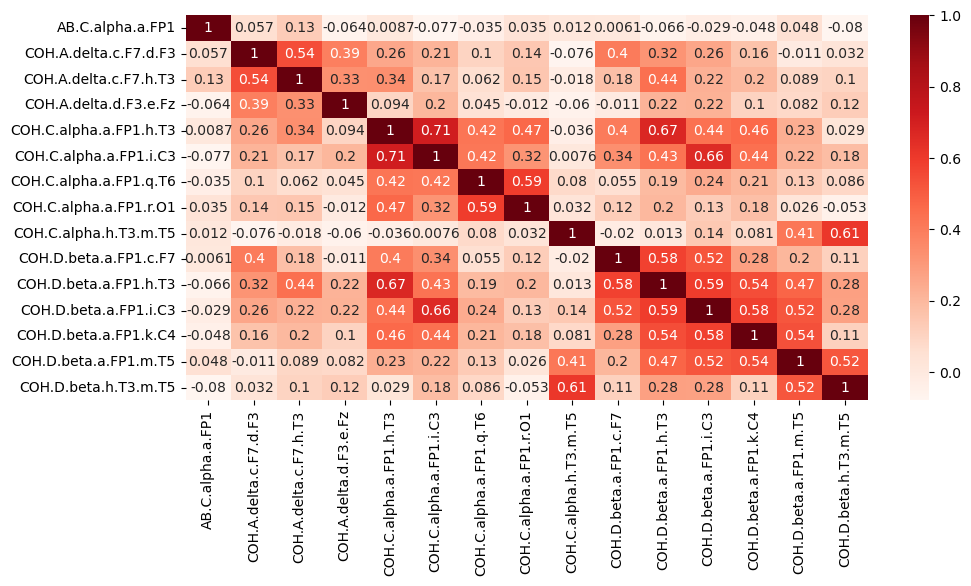

In [72]:
#Heatmap after reducing feature
import seaborn as sns
#Using Pearson Correlation
corrmat = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,5)
sns.heatmap(corrmat,annot=True, cmap="Reds")

In [73]:
x_train_smt = x_train 
x_test_smt = x_test
y_train_smt = y_train 
y_test_smt  = y_test

In [74]:
algo_names=[]
all_accuracy=[]
all_sensitivity=[]
all_specificity=[]
all_f1Score=[]

# SVM

0.8125
0.8125
[[130  30]
 [ 30 130]]
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       160
         1.0       0.81      0.81      0.81       160

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



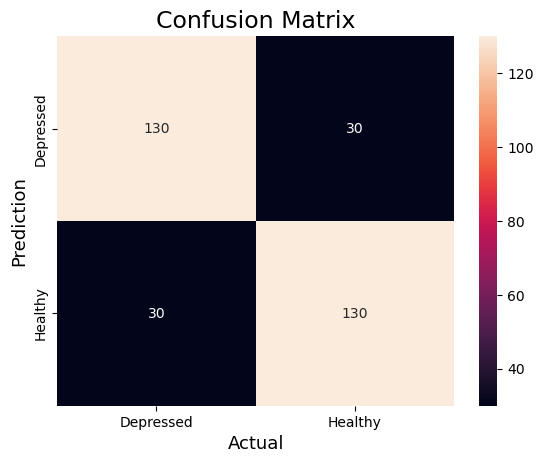

Sensitivity/TPR: 0.8125
FPR: 0.1875
Specificity/TNR: 0.8125
MCC: 0.625
Cohen Kappa: 0.625
0.9087109375 0.9087109375
Accuracy mean and std : 0.759 (0.058)
[[130  30]
 [ 30 130]]
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       160
         1.0       0.81      0.81      0.81       160

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



In [75]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
modelSVC = SVC(probability=True)
modelSVC.fit(x_train_smt, y_train_smt)
print(modelSVC.score(x_test_smt, y_test_smt))

y_pred = modelSVC.predict(x_test_smt)
y_final = y_test
y_pred_svc = y_pred
ac = accuracy_score(y_test_smt, y_pred)
print(ac)
# Performance Measure of SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelSVC.predict(x_test_smt)
print(confusion_matrix(y_test_smt, y_pred))
print(classification_report(y_test_smt, y_pred))

from sklearn.metrics import cohen_kappa_score
cmSVC = confusion_matrix(y_test_smt, modelSVC.predict(x_test_smt))

#Plot the confusion matrix.
# import seaborn as sns
sns.heatmap(cmSVC,
            annot=True,
            fmt='g',
            xticklabels=['Depressed','Healthy'],
            yticklabels=['Depressed','Healthy'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()



#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred = modelSVC.predict(x_test_smt)
cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

print("Sensitivity/TPR: " + str(TPR))
print("FPR: " + str(FPR))
print("Specificity/TNR: " + str(TNR))
print("MCC: " + str(MCC_SVC))
print("Cohen Kappa: " + str(cohen_score))
algo_names.append("SVM")
all_accuracy.append(ac)
all_sensitivity.append(TPR)
all_specificity.append(TNR)
f1Score=2*(TPR*PPV)/(TPR+PPV)
all_f1Score.append(f1Score)

# AUC Score
from sklearn.metrics import roc_auc_score

# predict probabilities
pred_prob1 = modelSVC.predict_proba(x_test_smt)
pred_prob2 = modelSVC.predict_proba(x_test_smt)

# auc scores
auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])

print(auc_score1, auc_score2)
# Support Vector Classifier K - Fold CV
from sklearn.model_selection import cross_val_score
cv_score_for_SVC = cross_val_score(modelSVC, x_train_smt, y_train_smt, cv = 10)
cv_score_for_SVC

from statistics import mean
print('Accuracy mean and std : %.3f (%.3f)' % (mean(cv_score_for_SVC), np.std(cv_score_for_SVC)))
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelSVC.predict(x_test_smt)
print(confusion_matrix(y_test_smt, y_pred))
print(classification_report(y_test_smt, y_pred))

# Decision Tree Classifier Train, Test

In [76]:
# from sklearn import tree
# from sklearn.metrics import accuracy_score


# modelDTC = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=8)
# modelDTC.fit(x_train_smt, y_train_smt)
# print(modelDTC.score(x_test_smt, y_test_smt))

# # Predicting the Test set results
# y_pred = modelDTC.predict(x_test_smt)
# ac = accuracy_score(y_test_smt, y_pred)
# print(ac)

# # Performance Measure of DTC

# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

# y_pred = modelDTC.predict(x_test_smt)
# print(confusion_matrix(y_test_smt, y_pred))
# print(classification_report(y_test_smt, y_pred))


# from sklearn.metrics import cohen_kappa_score
# cmDTC = confusion_matrix(y_test_smt, modelDTC.predict(x_test_smt))

# #If we use TP TN FP and FN of below's comment we get range
# #FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
# #FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
# #TP = np.diag(cmSVC)
# #TN = cmSVC.sum() - (FP + FN + TP)

# TP = cmDTC[1,1]  
# TN = cmDTC[0,0] 
# FP = cmDTC[0,1] 
# FN = cmDTC[1,0] 

# # Sensitivity, hit rate, recall, or true positive rate
# TPR = TP/float(TP+FN)
# # Specificity or true negative rate
# TNR = TN/float(TN+FP) 
# # Precision or positive predictive value
# PPV = TP/float(TP+FP)
# # Negative predictive value
# NPV = TN/float(TN+FN)
# # Fall out or false positive rate
# FPR = FP/float(FP+TN)
# # False negative rate
# FNR = FN/float(TP+FN)
# # False discovery rate
# FDR = FP/float(TP+FP)
# # Accuracy
# totalDTC=sum(sum(cmDTC))
# Accuracy = (TN+TP)/totalDTC
# # MCC
# val = (TP * TN) - (FP * FN)
# MCC_DTC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# # Cohen Kappa
# Y_pred = modelDTC.predict(x_test_smt)
# cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

# print("Sensitivity/TPR: " + str(TPR))
# print("FPR: " + str(FPR))
# print("Specificity/TNR: " + str(TNR))
# print("MCC: " + str(MCC_DTC))
# print("Cohen Kappa: " + str(cohen_score))
# algo_names.append("DecissionTree")
# all_accuracy.append(ac)
# all_sensitivity.append(TPR)
# all_specificity.append(TNR)
# f1Score=2*(TPR*PPV)/(TPR+PPV)
# all_f1Score.append(f1Score)
# #AUC Score
# from sklearn.metrics import roc_auc_score

# # predict probabilities
# pred_prob1 = modelDTC.predict_proba(x_test_smt)
# pred_prob2 = modelDTC.predict_proba(x_test_smt)

# # auc scores
# auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
# auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])

# print(auc_score1, auc_score2)
# # Decision Tree Classifier K - Fold CV
# from sklearn.model_selection import cross_val_score
# cv_score_for_DTC = cross_val_score(modelDTC, x_train_smt, y_train_smt, cv = 10)
# cv_score_for_DTC
# print('Accuracy mean and std : %.3f (%.3f)' % (np.mean(cv_score_for_DTC), np.std(cv_score_for_DTC)))

# Random Forest Training and Testing

0.925
0.925


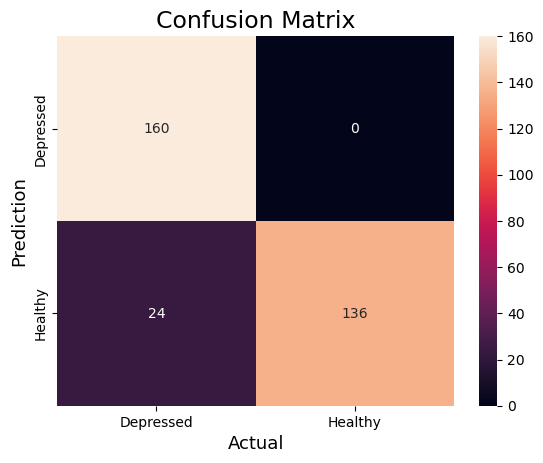

Sensitivity/TPR: 0.85
FPR: 0.0
Specificity/TNR: 1.0
MCC: 0.8597269536210952
Cohen Kappa: 0.85


In [77]:
from sklearn import ensemble
from sklearn.metrics import accuracy_score

modelRFC = ensemble.RandomForestClassifier(n_estimators = 2)
modelRFC.fit(x_train_smt, y_train_smt)
print(modelRFC.score(x_test_smt, y_test_smt))


# Predicting the Test set results
y_pred = modelRFC.predict(x_test_smt)
ac = accuracy_score(y_test_smt, y_pred)

y_pred_rf = y_pred
print(ac)

# Performance Measure of RFC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelRFC.predict(x_test_smt)
#print(confusion_matrix(y_test_smt, y_pred))
#print(classification_report(y_test_smt, y_pred))
cr=classification_report(y_test_smt,y_pred)
# f1Score=cr[2][0]
# print(f1Score)

from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test_smt, modelRFC.predict(x_test_smt))


#Plot the confusion matrix.
# import seaborn as sns
sns.heatmap(cmRFC,
            annot=True,
            fmt='g',
            xticklabels=['Depressed','Healthy'],
            yticklabels=['Depressed','Healthy'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred = modelRFC.predict(x_test_smt)
cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

print("Sensitivity/TPR: " + str(TPR))
print("FPR: " + str(FPR))
print("Specificity/TNR: " + str(TNR))
print("MCC: " + str(MCC_RFC))
print("Cohen Kappa: " + str(cohen_score))
algo_names.append("RandomForest")
all_accuracy.append(ac)
all_sensitivity.append(TPR)
all_specificity.append(TNR)
f1Score=2*(TPR*PPV)/(TPR+PPV)
all_f1Score.append(f1Score)
# #AUC Score
# from sklearn.metrics import roc_auc_score

# # predict probabilities
# pred_prob1 = modelRFC.predict_proba(x_test_smt)
# pred_prob2 = modelRFC.predict_proba(x_test_smt)

# # auc scores
# auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
# auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])

# print(auc_score1, auc_score2)
# # Random Forest Classifier K - Fold CV
# from sklearn.model_selection import cross_val_score
# cv_score_for_RFC = cross_val_score(modelRFC, x_train_smt, y_train_smt, cv = 10)
# cv_score_for_RFC
# print('Accuracy mean and std : %.3f (%.3f)' % (np.mean(cv_score_for_RFC), np.std(cv_score_for_RFC)))

# Logistic Regression Train, Test

In [78]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# modelLR = LogisticRegression()
# modelLR.fit(x_train_smt, y_train_smt)
# print(modelLR.score(x_test_smt, y_test_smt))


# # Predicting the Test set results
# y_pred = modelLR.predict(x_test_smt)
# ac = accuracy_score(y_test_smt, y_pred)
# print(ac)


# # Performance Measure of Logistic regression
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

# y_pred = modelLR.predict(x_test_smt)
# print(confusion_matrix(y_test_smt, y_pred))
# print(classification_report(y_test_smt, y_pred))
# from sklearn.metrics import cohen_kappa_score
# cmLR = confusion_matrix(y_test_smt, modelLR.predict(x_test_smt))

# #If we use TP TN FP and FN of below's comment we get range
# #FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
# #FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
# #TP = np.diag(cmSVC)
# #TN = cmSVC.sum() - (FP + FN + TP)

# TP = cmLR[1,1]  
# TN = cmLR[0,0] 
# FP = cmLR[0,1] 
# FN = cmLR[1,0] 

# # Sensitivity, hit rate, recall, or true positive rate
# TPR = TP/float(TP+FN)
# # Specificity or true negative rate
# TNR = TN/float(TN+FP) 
# # Precision or positive predictive value
# PPV = TP/float(TP+FP)
# # Negative predictive value
# NPV = TN/float(TN+FN)
# # Fall out or false positive rate
# FPR = FP/float(FP+TN)
# # False negative rate
# FNR = FN/float(TP+FN)
# # False discovery rate
# FDR = FP/float(TP+FP)
# # Accuracy
# totalLR=sum(sum(cmLR))
# Accuracy = (TN+TP)/totalLR
# # MCC
# val = (TP * TN) - (FP * FN)
# MCC_LR = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# # Cohen Kappa
# Y_pred = modelLR.predict(x_test_smt)
# cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

# print("Sensitivity/TPR: " + str(TPR))
# print("FPR: " + str(FPR))
# print("Specificity/TNR: " + str(TNR))
# print("MCC: " + str(MCC_LR))
# print("Cohen Kappa: " + str(cohen_score))
# algo_names.append("LogisticRegression")
# all_accuracy.append(ac)
# all_sensitivity.append(TPR)
# all_specificity.append(TNR)
# f1Score=2*(TPR*PPV)/(TPR+PPV)
# all_f1Score.append(f1Score)
# # AUC score
# from sklearn.metrics import roc_auc_score

# # predict probabilities
# pred_prob1 = modelLR.predict_proba(x_test_smt)
# pred_prob2 = modelLR.predict_proba(x_test_smt)

# # auc scores
# auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
# auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])

# print(auc_score1, auc_score2)
# # Logistic Regression K-fold CV
# from sklearn.model_selection import cross_val_score
# cv_score_for_LR = cross_val_score(modelLR, x_train_smt, y_train_smt, cv = 10)
# cv_score_for_LR
# print('Accuracy mean and std : %.3f (%.3f)' % (np.mean(cv_score_for_LR), np.std(cv_score_for_LR)))

# AdaBoost Algorithm Train, Test 

0.940625
0.940625
[[150  10]
 [  9 151]]
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       160
         1.0       0.94      0.94      0.94       160

    accuracy                           0.94       320
   macro avg       0.94      0.94      0.94       320
weighted avg       0.94      0.94      0.94       320



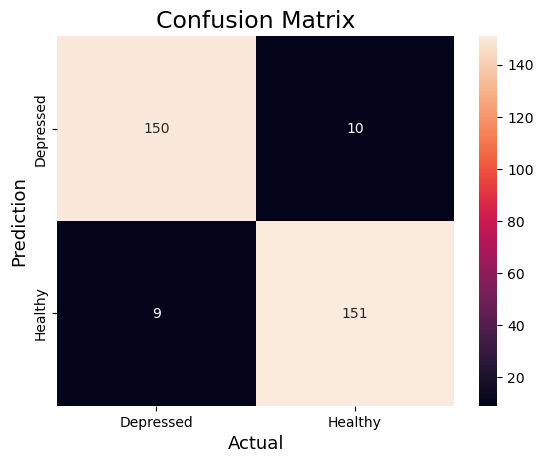

Sensitivity/TPR: 0.94375
FPR: 0.0625
Specificity/TNR: 0.9375
MCC: 0.8812672124183342
Cohen Kappa: 0.88125
0.9925781250000001 0.9925781250000001
[0.875   0.84375 0.90625 0.75    0.8125  0.78125 0.875   0.8125  0.8125
 0.8125 ]
Accuracy mean and std : 0.828 (0.045)


In [79]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

modelABC = AdaBoostClassifier(random_state = 10)
modelABC.fit(x_train_smt, y_train_smt)
print(modelABC.score(x_test_smt, y_test_smt))

# Predicting the Test set results
y_pred = modelABC.predict(x_test_smt)
ac = accuracy_score(y_test_smt, y_pred)
print(ac)

#performance Measure
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelABC.predict(x_test_smt)
print(confusion_matrix(y_test_smt, y_pred))
print(classification_report(y_test_smt, y_pred))

from sklearn.metrics import cohen_kappa_score
cmABC = confusion_matrix(y_test_smt, modelABC.predict(x_test_smt))

#Plot the confusion matrix.
# import seaborn as sns
sns.heatmap(cmABC,
            annot=True,
            fmt='g',
            xticklabels=['Depressed','Healthy'],
            yticklabels=['Depressed','Healthy'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()



#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmABC[1,1]  
TN = cmABC[0,0] 
FP = cmABC[0,1] 
FN = cmABC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalABC = sum(sum(cmABC))
Accuracy = (TN+TP)/totalABC

# MCC
val = (TP * TN) - (FP * FN)
MCC_ABC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

# Cohen Kappa
Y_pred = modelABC.predict(x_test_smt)
cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

print("Sensitivity/TPR: " + str(TPR))
print("FPR: " + str(FPR))
print("Specificity/TNR: " + str(TNR))
print("MCC: " + str(MCC_ABC))
print("Cohen Kappa: " + str(cohen_score))
algo_names.append("AdaBoost")
all_accuracy.append(ac)
all_sensitivity.append(TPR)
all_specificity.append(TNR)
f1Score=2*(TPR*PPV)/(TPR+PPV)
all_f1Score.append(f1Score)

#AUC Score
from sklearn.metrics import roc_auc_score

# predict probabilities
pred_prob1 = modelABC.predict_proba(x_test_smt)
pred_prob2 = modelABC.predict_proba(x_test_smt)

# auc scores
auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])

print(auc_score1, auc_score2)
from sklearn.model_selection import cross_val_score
cv_score_for_ABC = cross_val_score(modelABC, x_train_smt, y_train_smt, cv = 10)
print(cv_score_for_ABC)
print('Accuracy mean and std : %.3f (%.3f)' % (np.mean(cv_score_for_ABC), np.std(cv_score_for_ABC)))

## XGBoost

In [80]:
# # Training the Naive Bayes model on the Training set
# #conda install -c anaconda py-xgboost
# !pip install xgboost
# import xgboost as xgb
# from sklearn.metrics import accuracy_score

# modelXGB = xgb.XGBClassifier()

# modelXGB.fit(x_train_smt, y_train_smt)
# print('Training',modelXGB.score(x_train_smt, y_train_smt))
# # Predicting the Test set results
# y_pred = modelXGB.predict(x_test_smt)
# ac = accuracy_score(y_test_smt, y_pred)
# print('Testing',ac)
# cm = confusion_matrix(y_test_smt, y_pred)
# cm

# #performence measure
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

# y_pred = modelXGB.predict(x_test_smt)
# print(confusion_matrix(y_test_smt, y_pred))
# print(classification_report(y_test_smt, y_pred))
# from sklearn.metrics import cohen_kappa_score
# cmGNB = confusion_matrix(y_test_smt, modelXGB.predict(x_test_smt))

# #If we use TP TN FP and FN of below's comment we get range
# #FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
# #FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
# #TP = np.diag(cmSVC)
# #TN = cmSVC.sum() - (FP + FN + TP)

# TP = cmGNB[1,1]  
# TN = cmGNB[0,0] 
# FP = cmGNB[0,1] 
# FN = cmGNB[1,0] 

# # Sensitivity, hit rate, recall, or true positive rate
# TPR = TP/float(TP+FN)
# # Specificity or true negative rate
# TNR = TN/float(TN+FP) 
# # Precision or positive predictive value
# PPV = TP/float(TP+FP)
# # Negative predictive value
# NPV = TN/float(TN+FN)
# # Fall out or false positive rate
# FPR = FP/float(FP+TN)
# # False negative rate
# FNR = FN/float(TP+FN)
# # False discovery rate
# FDR = FP/float(TP+FP)
# # Accuracy
# totalGNB=sum(sum(cmGNB))
# Accuracy = (TN+TP)/totalGNB
# # MCC
# val = (TP * TN) - (FP * FN)
# MCC_GNB = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# # Cohen Kappa
# Y_pred = modelXGB.predict(x_test_smt)
# cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

# print("Sensitivity/TPR: " + str(TPR))
# print("FPR: " + str(FPR))
# print("Specificity/TNR: " + str(TNR))
# print("MCC: " + str(MCC_GNB))
# print("Cohen Kappa: " + str(cohen_score))
# algo_names.append("XGBoost")
# all_accuracy.append(ac)
# all_sensitivity.append(TPR)
# all_specificity.append(TNR)
# f1Score=2*(TPR*PPV)/(TPR+PPV)
# all_f1Score.append(f1Score)

# #AUC Score
# from sklearn.metrics import roc_auc_score

# # predict probabilities
# pred_prob1 = modelXGB.predict_proba(x_test_smt)
# pred_prob2 = modelXGB.predict_proba(x_test_smt)

# # auc scores
# auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
# auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])

# print(auc_score1, auc_score2)

# from sklearn.model_selection import cross_val_score
# cv_score_for_xgb= cross_val_score(modelXGB, x_train_smt, y_train_smt, cv = 10)
# print(cv_score_for_xgb)
# print('Accuracy mean and std : %.3f (%.3f)' % (np.mean(cv_score_for_xgb), np.std(cv_score_for_xgb)))

# KNN

0.80625
0.80625
[[137  23]
 [ 39 121]]
              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       160
         1.0       0.84      0.76      0.80       160

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

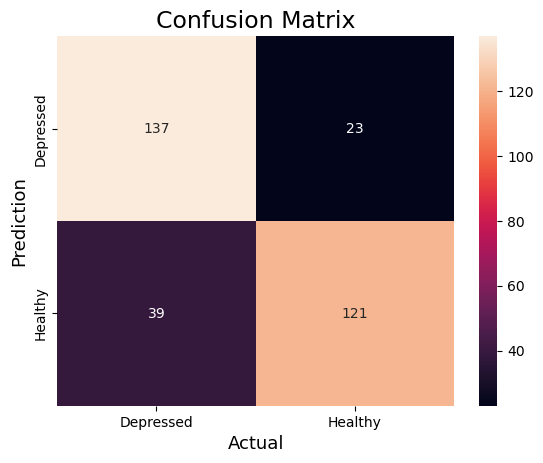

Sensitivity/TPR: 0.75625
FPR: 0.14375
Specificity/TNR: 0.85625
MCC: 0.6155856618462674
Cohen Kappa: 0.6125


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

modelKNN = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', metric = 'minkowski', p = 2)
modelKNN.fit(x_train_smt, y_train_smt)
print(modelKNN.score(x_test_smt, y_test_smt))

# Predicting the Test set results
y_pred = modelKNN.predict(x_test_smt)
ac = accuracy_score(y_test_smt, y_pred)
print(ac)

# Performance Measure of KNN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = modelKNN.predict(x_test_smt)
print(confusion_matrix(y_test_smt, y_pred))
print(classification_report(y_test_smt, y_pred))
from sklearn.metrics import cohen_kappa_score
cmKNN = confusion_matrix(y_test_smt, modelKNN.predict(x_test_smt))


#Plot the confusion matrix.
# import seaborn as sns
sns.heatmap(cmKNN,
            annot=True,
            fmt='g',
            xticklabels=['Depressed','Healthy'],
            yticklabels=['Depressed','Healthy'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()



#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmKNN[1,1]  
TN = cmKNN[0,0] 
FP = cmKNN[0,1] 
FN = cmKNN[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalKNN = sum(sum(cmKNN))
Accuracy = (TN+TP)/totalKNN
# MCC
val = (TP * TN) - (FP * FN)
MCC_KNN = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred = modelKNN.predict(x_test_smt)
cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

print("Sensitivity/TPR: " + str(TPR))
print("FPR: " + str(FPR))
print("Specificity/TNR: " + str(TNR))
print("MCC: " + str(MCC_KNN))
print("Cohen Kappa: " + str(cohen_score))
algo_names.append("KNN")
all_accuracy.append(ac)
all_sensitivity.append(TPR)
all_specificity.append(TNR)
f1Score=2*(TPR*PPV)/(TPR+PPV)
all_f1Score.append(f1Score)

# Evaluation

In [82]:
from sklearn import metrics
print("Accuracy is",metrics.accuracy_score(y_test,y_pred)," when k = 3")
print("Accuracy is",metrics.accuracy_score(y_test,y_pred)," when k = 5")
print("Accuracy is",metrics.accuracy_score(y_test,y_pred)," when k = 7")

Accuracy is 0.80625  when k = 3
Accuracy is 0.80625  when k = 5
Accuracy is 0.80625  when k = 7


In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       160
         1.0       0.84      0.76      0.80       160

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



## Stacking Ensemble

Testing 1.0


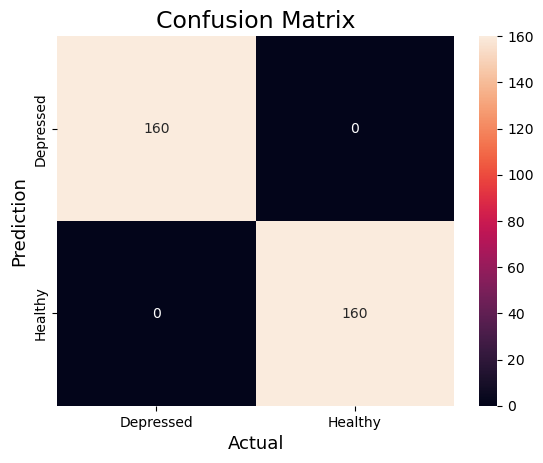

[[160   0]
 [  0 160]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       160
         1.0       1.00      1.00      1.00       160

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

Sensitivity/TPR: 1.0
FPR: 0.0
Specificity/TNR: 1.0
MCC: 1.0
Cohen Kappa: 1.0


In [84]:
#make a prediction with a stacking ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


# define the base models
level0 = list()
#level0.append(('lr', LogisticRegression()))  #52.8%  (but increasing the accuracy)
level0.append(('knn', KNeighborsClassifier()))
#level0.append(('cart', DecisionTreeClassifier()))  #adding it gives worst performance
#level0.append(('CB',CatBoostClassifier(iterations=500)))
level0.append(('svm', SVC()))  #58.6%
#level0.append(('xgb',xgb.XGBClassifier()))   #69.9%
level0.append(('rf', ensemble.RandomForestClassifier()))  # 72


# define meta learner model
level1 = LogisticRegression()
#level1 = ensemble.RandomForestClassifier()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)

# fit the model on all available data
model.fit(x_train_smt, y_train_smt)

y_pred = model.predict(x_test_smt)
ac = accuracy_score(y_test_smt, y_pred)
print('Testing',ac)
cm = confusion_matrix(y_test_smt, y_pred)
cm

#Plot the confusion matrix.
# import seaborn as sns
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Depressed','Healthy'],
            yticklabels=['Depressed','Healthy'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()




from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = model.predict(x_test_smt)
print(confusion_matrix(y_test_smt, y_pred))
print(classification_report(y_test_smt, y_pred))

from sklearn.metrics import cohen_kappa_score
cmGNB = confusion_matrix(y_test_smt, model.predict(x_test_smt))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmGNB[1,1]  
TN = cmGNB[0,0] 
FP = cmGNB[0,1] 
FN = cmGNB[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalGNB=sum(sum(cmGNB))
Accuracy = (TN+TP)/totalGNB
# MCC
val = (TP * TN) - (FP * FN)
MCC_GNB = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred = model.predict(x_test_smt)
cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

print("Sensitivity/TPR: " + str(TPR))
print("FPR: " + str(FPR))
print("Specificity/TNR: " + str(TNR))
print("MCC: " + str(MCC_GNB))
print("Cohen Kappa: " + str(cohen_score))
algo_names.append("StackingEnsemble")
all_accuracy.append(ac)
all_sensitivity.append(TPR)
all_specificity.append(TNR)
f1Score=2*(TPR*PPV)/(TPR+PPV)
all_f1Score.append(f1Score)

In [85]:
Performance_Matrix = {
    "Algo Names": algo_names,
    "Accuracy": all_accuracy,
    "Sensitivity": all_sensitivity,
    "Specificity": all_specificity,
    "F1-Score": all_f1Score
  
   # "AUC": auc_scores
    # Add more key-value pairs for other metrics if needed
}
Performance_Matrix = pd.DataFrame(Performance_Matrix)
Performance_Matrix

Algo Names  Accuracy  Sensitivity  Specificity  F1-Score
0               SVM  0.812500      0.81250      0.81250  0.812500
1      RandomForest  0.925000      0.85000      1.00000  0.918919
2          AdaBoost  0.940625      0.94375      0.93750  0.940810
3               KNN  0.806250      0.75625      0.85625  0.796053
4  StackingEnsemble  1.000000      1.00000      1.00000  1.000000

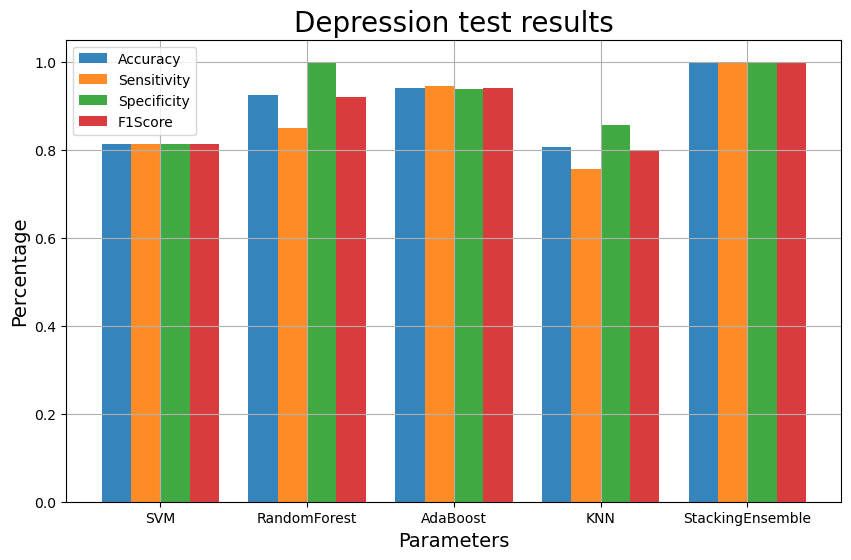

In [86]:
#bar chart for informations
index=np.arange(5)
bar_width=.2

plt.figure(figsize=(10, 6))
k1=plt.bar(index,all_accuracy,bar_width,alpha=.9,label="Accuracy")
c1=plt.bar(index+bar_width,all_sensitivity,bar_width,alpha=.9,label="Sensitivity")
ch1=plt.bar(index+bar_width*2,all_specificity,bar_width,alpha=.9,label="Specificity")
f1=plt.bar(index+bar_width*3,all_f1Score,bar_width,alpha=.9,label="F1Score")

plt.xticks(index+.6/2,algo_names)
plt.ylabel('Percentage',fontsize=14)
plt.xlabel('Parameters',fontsize=14)
plt.title('Depression test results',fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

# 5-Fold Cross Validation SVM

In [87]:
depressed=mood_data[mood_data['specific_disorder']==1]
healthy=mood_data[mood_data['specific_disorder'].isin([0])]


fold_names = []
accuracies = []
Sensitivity = []
Specificity=[]
F1Score=[]
FPRs = []
cohen_kappas = []
auc_scores = []
    
final_ac=0
final_TPR=0  #Sensitivity, recall
final_TNR=0  # Specifity
final_f1Score=0
final_PPV=0  # Precission
final_FPR=0  
final_cohen_score=0
final_auc_score1=0
for i in range(5):
    fr=(i+1)*40
#     if i==4:
#         fr=fr-1
    #print(fr)
    test_depressed = depressed.iloc[i*40:(i+1)*40, :]
    #test_depressed.head()
    train_depressed = depressed[~depressed.isin(test_depressed)].dropna(how = 'all')
    train_depressed
    test_healthy = healthy.iloc[i*(40):40*(i+1), :]
    #print(19*(i+1))
    #test_depressed.head()
    train_healthy = healthy[~healthy.isin(test_healthy)].dropna(how = 'all')
    train_healthy
    train_all=pd.concat([train_depressed,train_healthy])
    test_all=pd.concat([test_depressed,test_healthy])
    y_train=train_all['specific_disorder']
    x_train=train_all.drop('specific_disorder', axis=1)
    y_test=test_all['specific_disorder']
    x_test=test_all.drop('specific_disorder', axis=1)
    x_train_smt = x_train 
    x_test_smt = x_test
    y_train_smt = y_train 
    y_test_smt  = y_test
    

    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    modelSVC = SVC(probability=True)
    modelSVC.fit(x_train_smt, y_train_smt)
    #print(modelSVC.score(x_test_smt, y_test_smt))

    y_pred = modelSVC.predict(x_test_smt)
    y_final = y_test
    y_pred_svc = y_pred
    ac = accuracy_score(y_test_smt, y_pred)
    print(ac)
    
    
    # Performance Measure of SVC
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    y_pred = modelSVC.predict(x_test_smt)
    #print(confusion_matrix(y_test_smt, y_pred))
    #print(classification_report(y_test_smt, y_pred))
    from sklearn.metrics import cohen_kappa_score
    cmSVC = confusion_matrix(y_test_smt, modelSVC.predict(x_test_smt))
    cmSVC
    
    #If we use TP TN FP and FN of below's comment we get range
    #FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
    #FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
    #TP = np.diag(cmSVC)
    #TN = cmSVC.sum() - (FP + FN + TP)
    
    TP = cmSVC[1,1]  
    TN = cmSVC[0,0] 
    FP = cmSVC[0,1] 
    FN = cmSVC[1,0] 
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/float(TP+FN)
    # Specificity or true negative rate
    TNR = TN/float(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/float(TP+FP)
    # Negative predictive value
    NPV = TN/float(TN+FN)
    # Fall out or false positive rate
    FPR = FP/float(FP+TN)
    # False negative rate
    FNR = FN/float(TP+FN)
    # False discovery rate
    FDR = FP/float(TP+FP)
    totalSVC=sum(sum(cmSVC))
    Accuracy = (TN+TP)/totalSVC
    # MCC
    val = (TP * TN) - (FP * FN)
    MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    # Cohen Kappa
    Y_pred = modelSVC.predict(x_test_smt)
    cohen_score = cohen_kappa_score(y_test_smt, Y_pred)
    
    #print("Sensitivity/TPR: " + str(TPR))
    #print("FPR: " + str(FPR))
    #print("Specificity/TNR: " + str(TNR))
    #print("MCC: " + str(MCC_SVC))
    #print("Cohen Kappa: " + str(cohen_score))
    
    # AUC Score
    from sklearn.metrics import roc_auc_score

    # predict probabilities
    pred_prob1 = modelSVC.predict_proba(x_test_smt)
    pred_prob2 = modelSVC.predict_proba(x_test_smt)

    # auc scores
    auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
    auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])

    #print(auc_score1, auc_score2)
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    y_pred = modelSVC.predict(x_test_smt)
    #print(confusion_matrix(y_test_smt, y_pred))
    #print(classification_report(y_test_smt, y_pred))
    
    foldNo="fold "+str(i+1)
    final_ac=final_ac+ac
    final_TPR=final_TPR+TPR
    final_TNR=final_TNR+TNR
    final_FPR=final_FPR+FPR
    final_cohen_score=final_cohen_score+cohen_score
    final_auc_score1=final_auc_score1+auc_score1
    f1Score=2*(TPR*PPV)/(TPR+PPV)
    final_f1Score=final_f1Score+f1Score
    fold_names.append(foldNo)
    accuracies.append(ac)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    F1Score.append(f1Score)
    FPRs.append(FPR)
    cohen_kappas.append(cohen_score)
    auc_scores.append(auc_score1)
    
final_ac=final_ac/5.0
final_TPR=final_TPR/5.0
final_TNR=final_TNR/5.0
final_f1Score=final_f1Score/5.0
final_FPR=final_FPR/5.0
final_cohen_score=final_cohen_score/5.0
final_auc_score1=final_auc_score1/5.0

foldNo="average"
fold_names.append(foldNo)
accuracies.append(final_ac)
Sensitivity.append(final_TPR)
Specificity.append(final_TNR)
F1Score.append(final_f1Score)
FPRs.append(final_FPR)
cohen_kappas.append(final_cohen_score)
auc_scores.append(final_auc_score1)





Performance_Matrix = {
    "SVM": fold_names,
    "Accuracy": accuracies,
    "Sensitivity": Sensitivity,
    "Specificity": Specificity,
    "F1-Score": F1Score,
    "FPR": FPRs
   # "AUC": auc_scores
    # Add more key-value pairs for other metrics if needed
}
 
Performance_Matrix = pd.DataFrame(Performance_Matrix)
Performance_Matrix


0.6875
0.8
0.8
0.775
0.725


SVM  Accuracy  Sensitivity  Specificity  F1-Score    FPR
0   fold 1    0.6875        0.700        0.675  0.691358  0.325
1   fold 2    0.8000        0.950        0.650  0.826087  0.350
2   fold 3    0.8000        0.750        0.850  0.789474  0.150
3   fold 4    0.7750        0.750        0.800  0.769231  0.200
4   fold 5    0.7250        0.625        0.825  0.694444  0.175
5  average    0.7575        0.755        0.760  0.754119  0.240

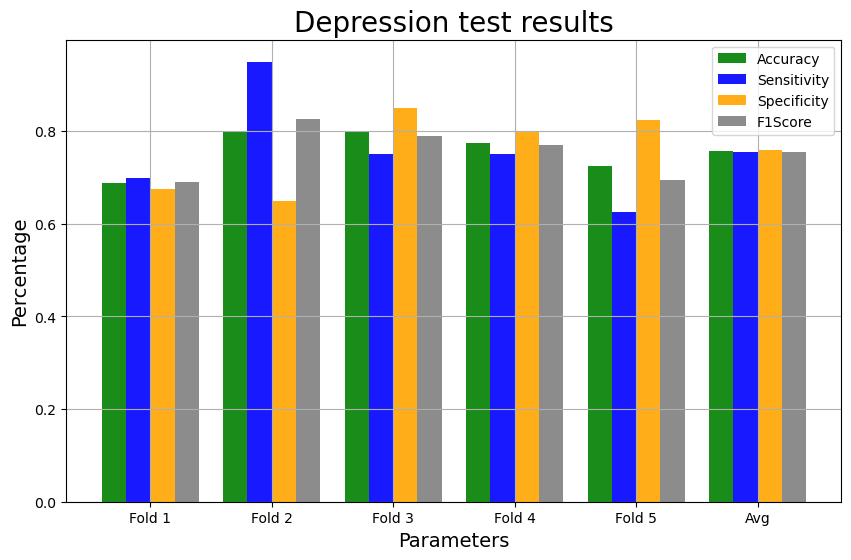

In [88]:
#bar chart for informations
index=np.arange(6)
bar_width=.2

plt.figure(figsize=(10, 6))
k1=plt.bar(index,accuracies,bar_width,alpha=.9,color='green',label="Accuracy")
c1=plt.bar(index+bar_width,Sensitivity,bar_width,alpha=.9,color='blue',label="Sensitivity")
ch1=plt.bar(index+bar_width*2,Specificity,bar_width,alpha=.9,color='orange',label="Specificity")
f1=plt.bar(index+bar_width*3,F1Score,bar_width,alpha=.9,color='gray',label="F1Score")

plt.xticks(index+.6/2,('Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Avg'))
plt.ylabel('Percentage',fontsize=14)
plt.xlabel('Parameters',fontsize=14)
plt.title('Depression test results',fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

# 5 Fold Cross Validation of Decision Tree Classifier

In [89]:
# depressed=mood_data[mood_data['specific_disorder']==1]
# healthy=mood_data[mood_data['specific_disorder'].isin([0])]


# fold_names = []
# accuracies = []
# Sensitivity = []
# Specificity=[]
# F1Score=[]
# FPRs = []
# cohen_kappas = []
# auc_scores = []
    
# final_ac=0
# final_TPR=0  #Sensitivity, recall
# final_TNR=0  # Specifity
# final_f1Score=0
# final_PPV=0  # Precission
# final_FPR=0  
# final_cohen_score=0
# final_auc_score1=0
# for i in range(5):
#     fr=(i+1)*40
# #     if i==4:
# #         fr=fr-1
#     #print(fr)
#     test_depressed = depressed.iloc[i*40:(i+1)*40, :]
#     #test_depressed.head()
#     train_depressed = depressed[~depressed.isin(test_depressed)].dropna(how = 'all')
#     train_depressed
#     test_healthy = healthy.iloc[i*(40):40*(i+1), :]
#     #print(19*(i+1))
#     #test_depressed.head()
#     train_healthy = healthy[~healthy.isin(test_healthy)].dropna(how = 'all')
#     train_healthy
#     train_all=pd.concat([train_depressed,train_healthy])
#     test_all=pd.concat([test_depressed,test_healthy])
#     y_train=train_all['specific_disorder']
#     x_train=train_all.drop('specific_disorder', axis=1)
#     y_test=test_all['specific_disorder']
#     x_test=test_all.drop('specific_disorder', axis=1)
#     x_train_smt = x_train 
#     x_test_smt = x_test
#     y_train_smt = y_train 
#     y_test_smt  = y_test
    

#     #Decission Tree Main Model
    
#     from sklearn import tree
#     from sklearn.metrics import accuracy_score


#     modelDTC = tree.DecisionTreeClassifier(max_depth=100, min_samples_leaf=5, min_samples_split=8)
#     modelDTC.fit(x_train_smt, y_train_smt)
#     #print(modelDTC.score(x_test_smt, y_test_smt))

#     # Predicting the Test set results
#     y_pred = modelDTC.predict(x_test_smt)
#     ac = accuracy_score(y_test_smt, y_pred)
#     print(ac)

    
#     # Performance Measure of DTC

#     from sklearn.metrics import confusion_matrix
#     from sklearn.metrics import classification_report
#     y_pred = modelDTC.predict(x_test_smt)
    
#     from sklearn.metrics import cohen_kappa_score
#     cmDTC = confusion_matrix(y_test_smt, modelDTC.predict(x_test_smt))

#     #If we use TP TN FP and FN of below's comment we get range
#     #FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#     #FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#     #TP = np.diag(cmSVC)
#     #TN = cmSVC.sum() - (FP + FN + TP)

#     TP = cmDTC[1,1]  
#     TN = cmDTC[0,0] 
#     FP = cmDTC[0,1] 
#     FN = cmDTC[1,0] 

#     # Sensitivity, hit rate, recall, or true positive rate
#     TPR = TP/float(TP+FN)
#     # Specificity or true negative rate
#     TNR = TN/float(TN+FP) 
#     # Precision or positive predictive value
#     PPV = TP/float(TP+FP)
#     # Negative predictive value
#     NPV = TN/float(TN+FN)
#     # Fall out or false positive rate
#     FPR = FP/float(FP+TN)
#     # False negative rate
#     FNR = FN/float(TP+FN)
#     # False discovery rate
#     FDR = FP/float(TP+FP)
#     # Accuracy
#     totalDTC=sum(sum(cmDTC))
#     Accuracy = (TN+TP)/totalDTC
#     # MCC
#     val = (TP * TN) - (FP * FN)
#     MCC_DTC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
#     # Cohen Kappa
#     Y_pred = modelDTC.predict(x_test_smt)
#     cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

#     #print("Sensitivity/TPR: " + str(TPR))
#     #print("FPR: " + str(FPR))
#     #print("Specificity/TNR: " + str(TNR))
#     #print("MCC: " + str(MCC_DTC))
#     #print("Cohen Kappa: " + str(cohen_score))
    
#     #AUC Score
#     from sklearn.metrics import roc_auc_score

#     # predict probabilities
#     pred_prob1 = modelDTC.predict_proba(x_test_smt)
#     pred_prob2 = modelDTC.predict_proba(x_test_smt)

#     # auc scores
#     auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
#     auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])



   
#     foldNo="fold "+str(i+1)
#     final_ac=final_ac+ac
#     final_TPR=final_TPR+TPR
#     final_TNR=final_TNR+TNR
#     final_FPR=final_FPR+FPR
#     final_cohen_score=final_cohen_score+cohen_score
#     final_auc_score1=final_auc_score1+auc_score1
#     f1Score=2*(TPR*PPV)/(TPR+PPV)
#     final_f1Score=final_f1Score+f1Score
#     fold_names.append(foldNo)
#     accuracies.append(ac)
#     Sensitivity.append(TPR)
#     Specificity.append(TNR)
#     F1Score.append(f1Score)
#     FPRs.append(FPR)
#     cohen_kappas.append(cohen_score)
#     auc_scores.append(auc_score1)
    
# final_ac=final_ac/5.0
# final_TPR=final_TPR/5.0
# final_TNR=final_TNR/5.0
# final_f1Score=final_f1Score/5.0
# final_FPR=final_FPR/5.0
# final_cohen_score=final_cohen_score/5.0
# final_auc_score1=final_auc_score1/5.0

# foldNo="average"
# fold_names.append(foldNo)
# accuracies.append(final_ac)
# Sensitivity.append(final_TPR)
# Specificity.append(final_TNR)
# F1Score.append(final_f1Score)
# FPRs.append(final_FPR)
# cohen_kappas.append(final_cohen_score)
# auc_scores.append(final_auc_score1)


# Performance_Matrix = {
#     "DecissionTree": fold_names,
#     "Accuracy": accuracies,
#     "Sensitivity": Sensitivity,
#     "Specificity": Specificity,
#     "F1-Score": F1Score,
#     "FPR": FPRs
#     #"Cohen's Kappa": cohen_kappas,
#    # "AUC": auc_scores
#     # Add more key-value pairs for other metrics if needed
# }


# Performance_Matrix = pd.DataFrame(Performance_Matrix)
# Performance_Matrix


In [90]:
# #bar chart for informations
# index=np.arange(6)
# bar_width=.2

# plt.figure(figsize=(10, 6))
# k1=plt.bar(index,accuracies,bar_width,alpha=.9,label="Accuracy")
# c1=plt.bar(index+bar_width,Sensitivity,bar_width,alpha=.9,label="Sensitivity")
# ch1=plt.bar(index+bar_width*2,Specificity,bar_width,alpha=.9,label="Specificity")
# f1=plt.bar(index+bar_width*3,F1Score,bar_width,alpha=.9,label="F1Score")

# plt.xticks(index+.6/2,('Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Avg'))
# plt.ylabel('Percentage',fontsize=14)
# plt.xlabel('Parameters',fontsize=14)
# plt.title('Depression test results',fontsize=20)
# plt.grid(True)
# plt.legend()
# plt.show()

# 5 Fold Cross Validation Random Forest 

In [91]:
depressed=mood_data[mood_data['specific_disorder']==1]
healthy=mood_data[mood_data['specific_disorder'].isin([0])]

fold_names = []
accuracies = []
Sensitivity = []
Specificity=[]
F1Score=[]
FPRs = []
cohen_kappas = []
auc_scores = []
    
final_ac=0
final_TPR=0  #Sensitivity, recall
final_TNR=0  # Specifity
final_f1Score=0
final_PPV=0  # Precission
final_FPR=0  
final_cohen_score=0
final_auc_score1=0

for i in range(5):
    fr=(i+1)*40
#     if i==4:
#         fr=fr-1
    #print(fr)
    test_depressed = depressed.iloc[i*40:(i+1)*40, :]
    #test_depressed.head()
    train_depressed = depressed[~depressed.isin(test_depressed)].dropna(how = 'all')
    train_depressed
    test_healthy = healthy.iloc[i*(40):40*(i+1), :]
    #print(19*(i+1))
    #test_depressed.head()
    train_healthy = healthy[~healthy.isin(test_healthy)].dropna(how = 'all')
    train_healthy
    train_all=pd.concat([train_depressed,train_healthy])
    test_all=pd.concat([test_depressed,test_healthy])
    y_train=train_all['specific_disorder']
    x_train=train_all.drop('specific_disorder', axis=1)
    y_test=test_all['specific_disorder']
    x_test=test_all.drop('specific_disorder', axis=1)
    x_train_smt = x_train 
    x_test_smt = x_test
    y_train_smt = y_train 
    y_test_smt  = y_test
    
    #Random Forest Main
    from sklearn import ensemble
    from sklearn.metrics import accuracy_score

    modelRFC = ensemble.RandomForestClassifier(n_estimators = 12)
    modelRFC.fit(x_train_smt, y_train_smt)
    #print(modelRFC.score(x_test_smt, y_test_smt))
    # Predicting the Test set results
    y_pred = modelRFC.predict(x_test_smt)
    ac = accuracy_score(y_test_smt, y_pred)
    y_pred_rf = y_pred
    print(ac)

    # Performance Measure of RFC
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    y_pred = modelRFC.predict(x_test_smt)
    
    from sklearn.metrics import cohen_kappa_score
    cmRFC = confusion_matrix(y_test_smt, modelRFC.predict(x_test_smt))



    TP = cmRFC[1,1]  
    TN = cmRFC[0,0] 
    FP = cmRFC[0,1] 
    FN = cmRFC[1,0] 

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/float(TP+FN)
    # Specificity or true negative rate
    TNR = TN/float(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/float(TP+FP)
    # Negative predictive value
    NPV = TN/float(TN+FN)
    # Fall out or false positive rate
    FPR = FP/float(FP+TN)
    # False negative rate
    FNR = FN/float(TP+FN)
    # False discovery rate
    FDR = FP/float(TP+FP)
    # Accuracy
    totalRFC=sum(sum(cmRFC))
    Accuracy = (TN+TP)/totalRFC
    # MCC
    val = (TP * TN) - (FP * FN)
    MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    # Cohen Kappa
    Y_pred = modelRFC.predict(x_test_smt)
    cohen_score = cohen_kappa_score(y_test_smt, Y_pred)
 
    #AUC Score
    from sklearn.metrics import roc_auc_score

    # predict probabilities
    pred_prob1 = modelRFC.predict_proba(x_test_smt)
    pred_prob2 = modelRFC.predict_proba(x_test_smt)
    
    # auc scores
    auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
    auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])

    
    
    foldNo="fold "+str(i+1)
    final_ac=final_ac+ac
    final_TPR=final_TPR+TPR
    final_TNR=final_TNR+TNR
    final_FPR=final_FPR+FPR
    final_cohen_score=final_cohen_score+cohen_score
    final_auc_score1=final_auc_score1+auc_score1
    f1Score=2*(TPR*PPV)/(TPR+PPV)
    final_f1Score=final_f1Score+f1Score
    fold_names.append(foldNo)
    accuracies.append(ac)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    F1Score.append(f1Score)
    FPRs.append(FPR)
    cohen_kappas.append(cohen_score)
    auc_scores.append(auc_score1)
    
final_ac=final_ac/5.0
final_TPR=final_TPR/5.0
final_TNR=final_TNR/5.0
final_f1Score=final_f1Score/5.0
final_FPR=final_FPR/5.0
final_cohen_score=final_cohen_score/5.0
final_auc_score1=final_auc_score1/5.0

foldNo="average"
fold_names.append(foldNo)
accuracies.append(final_ac)
Sensitivity.append(final_TPR)
Specificity.append(final_TNR)
F1Score.append(final_f1Score)
FPRs.append(final_FPR)
cohen_kappas.append(final_cohen_score)
auc_scores.append(final_auc_score1)


Performance_Matrix = {
    "Random Forest": fold_names,
    "Accuracy": accuracies,
    "Sensitivity": Sensitivity,
    "Specificity": Specificity,
    "F1-Score": F1Score,
    "FPR": FPRs
    #"Cohen's Kappa": cohen_kappas,
   # "AUC": auc_scores
    # Add more key-value pairs for other metrics if needed
}


Performance_Matrix = pd.DataFrame(Performance_Matrix)
Performance_Matrix


0.9
0.9125
0.8875
0.9125
0.85


Random Forest  Accuracy  Sensitivity  Specificity  F1-Score    FPR
0        fold 1    0.9000        0.875        0.925  0.897436  0.075
1        fold 2    0.9125        0.950        0.875  0.915663  0.125
2        fold 3    0.8875        0.825        0.950  0.880000  0.050
3        fold 4    0.9125        0.950        0.875  0.915663  0.125
4        fold 5    0.8500        0.750        0.950  0.833333  0.050
5       average    0.8925        0.870        0.915  0.888419  0.085

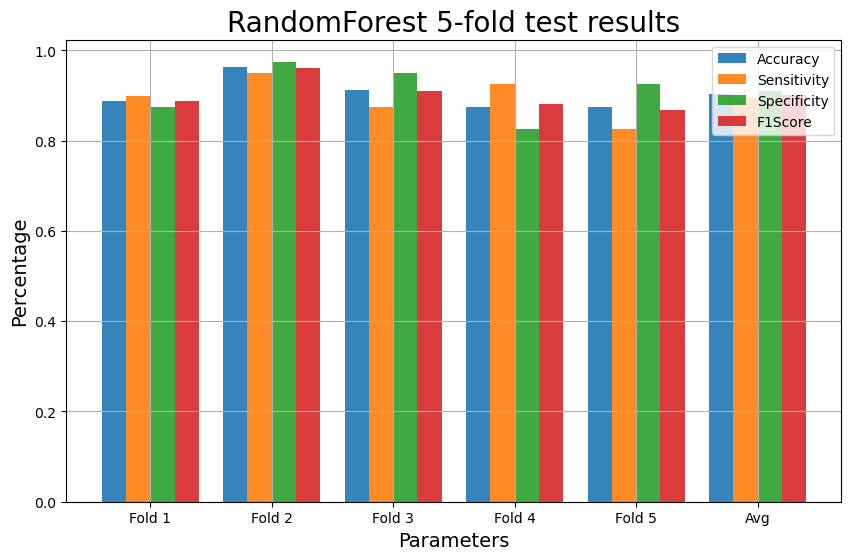

In [100]:
#bar chart for informations
index=np.arange(6)
bar_width=.2

plt.figure(figsize=(10, 6))
k1=plt.bar(index,accuracies,bar_width,alpha=.9,label="Accuracy")
c1=plt.bar(index+bar_width,Sensitivity,bar_width,alpha=.9,label="Sensitivity")
ch1=plt.bar(index+bar_width*2,Specificity,bar_width,alpha=.9,label="Specificity")
f1=plt.bar(index+bar_width*3,F1Score,bar_width,alpha=.9,label="F1Score")

plt.xticks(index+.6/2,('Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Avg'))
plt.ylabel('Percentage',fontsize=14)
plt.xlabel('Parameters',fontsize=14)
plt.title('RandomForest 5-fold test results',fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

# 5-Fold Cross Validation for Logistic Regression

In [93]:

# depressed=mood_data[mood_data['specific_disorder']==1]
# healthy=mood_data[mood_data['specific_disorder'].isin([0])]


# fold_names = []
# accuracies = []
# Sensitivity = []
# Specificity=[]
# F1Score=[]
# FPRs = []
# cohen_kappas = []
# auc_scores = []
    
# final_ac=0
# final_TPR=0  #Sensitivity, recall
# final_TNR=0  # Specifity
# final_f1Score=0
# final_PPV=0  # Precission
# final_FPR=0  
# final_cohen_score=0
# final_auc_score1=0

# for i in range(5):
#     fr=(i+1)*40
# #     if i==4:
# #         fr=fr-1
#     #print(fr)
#     test_depressed = depressed.iloc[i*40:(i+1)*40, :]
#     #test_depressed.head()
#     train_depressed = depressed[~depressed.isin(test_depressed)].dropna(how = 'all')
#     train_depressed
#     test_healthy = healthy.iloc[i*(40):40*(i+1), :]
#     #print(19*(i+1))
#     #test_depressed.head()
#     train_healthy = healthy[~healthy.isin(test_healthy)].dropna(how = 'all')
#     train_healthy
#     train_all=pd.concat([train_depressed,train_healthy])
#     test_all=pd.concat([test_depressed,test_healthy])
#     y_train=train_all['specific_disorder']
#     x_train=train_all.drop('specific_disorder', axis=1)
#     y_test=test_all['specific_disorder']
#     x_test=test_all.drop('specific_disorder', axis=1)
#     x_train_smt = x_train 
#     x_test_smt = x_test
#     y_train_smt = y_train 
#     y_test_smt  = y_test
    
#     from sklearn.linear_model import LogisticRegression
#     from sklearn.metrics import accuracy_score

#     modelLR = LogisticRegression()
#     modelLR.fit(x_train_smt, y_train_smt)
#     #print(modelLR.score(x_test_smt, y_test_smt))

#     # Predicting the Test set results
#     y_pred = modelLR.predict(x_test_smt)
#     ac = accuracy_score(y_test_smt, y_pred)
#     print(ac)
    
#     # Performance Measure of Logistic regression
#     from sklearn.metrics import confusion_matrix
#     from sklearn.metrics import classification_report
#     y_pred = modelLR.predict(x_test_smt)
    
    
#     from sklearn.metrics import cohen_kappa_score
#     cmLR = confusion_matrix(y_test_smt, modelLR.predict(x_test_smt))
    
    
#     TP = cmLR[1,1]  
#     TN = cmLR[0,0] 
#     FP = cmLR[0,1] 
#     FN = cmLR[1,0] 

#     # Sensitivity, hit rate, recall, or true positive rate
#     TPR = TP/float(TP+FN)
#     # Specificity or true negative rate
#     TNR = TN/float(TN+FP) 
#     # Precision or positive predictive value
#     PPV = TP/float(TP+FP)
#     # Negative predictive value
#     NPV = TN/float(TN+FN)
#     # Fall out or false positive rate
#     FPR = FP/float(FP+TN)
#     # False negative rate
#     FNR = FN/float(TP+FN)
#     # False discovery rate
#     FDR = FP/float(TP+FP)
#     # Accuracy
#     totalLR=sum(sum(cmLR))
#     Accuracy = (TN+TP)/totalLR
#     # MCC
#     val = (TP * TN) - (FP * FN)
#     MCC_LR = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
#     # Cohen Kappa
#     Y_pred = modelLR.predict(x_test_smt)
#     cohen_score = cohen_kappa_score(y_test_smt, Y_pred)
#     # AUC score
#     from sklearn.metrics import roc_auc_score

#     # predict probabilities
#     pred_prob1 = modelLR.predict_proba(x_test_smt)
#     pred_prob2 = modelLR.predict_proba(x_test_smt)

#     # auc scores
#     auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
#     auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])
    
    
#     foldNo="fold "+str(i+1)
#     final_ac=final_ac+ac
#     final_TPR=final_TPR+TPR
#     final_TNR=final_TNR+TNR
#     final_FPR=final_FPR+FPR
#     final_cohen_score=final_cohen_score+cohen_score
#     final_auc_score1=final_auc_score1+auc_score1
#     f1Score=2*(TPR*PPV)/(TPR+PPV)
#     final_f1Score=final_f1Score+f1Score
#     fold_names.append(foldNo)
#     accuracies.append(ac)
#     Sensitivity.append(TPR)
#     Specificity.append(TNR)
#     F1Score.append(f1Score)
#     FPRs.append(FPR)
#     cohen_kappas.append(cohen_score)
#     auc_scores.append(auc_score1)
    
# final_ac=final_ac/5.0
# final_TPR=final_TPR/5.0
# final_TNR=final_TNR/5.0
# final_f1Score=final_f1Score/5.0
# final_FPR=final_FPR/5.0
# final_cohen_score=final_cohen_score/5.0
# final_auc_score1=final_auc_score1/5.0

# foldNo="average"
# fold_names.append(foldNo)
# accuracies.append(final_ac)
# Sensitivity.append(final_TPR)
# Specificity.append(final_TNR)
# F1Score.append(final_f1Score)
# FPRs.append(final_FPR)
# cohen_kappas.append(final_cohen_score)
# auc_scores.append(final_auc_score1)


# Performance_Matrix = {
#     "Logistic Regression": fold_names,
#     "Accuracy": accuracies,
#     "Sensitivity": Sensitivity,
#     "Specificity": Specificity,
#     "F1-Score": F1Score,
#     "FPR": FPRs,
#     #"Cohen's Kappa": cohen_kappas,
#    # "AUC": auc_scores
#     # Add more key-value pairs for other metrics if needed
# }


# Performance_Matrix = pd.DataFrame(Performance_Matrix)
# Performance_Matrix


In [94]:
# #bar chart for informations
# index=np.arange(6)
# bar_width=.2

# plt.figure(figsize=(10, 6))
# k1=plt.bar(index,accuracies,bar_width,alpha=.9,label="Accuracy")
# c1=plt.bar(index+bar_width,Sensitivity,bar_width,alpha=.9,label="Sensitivity")
# ch1=plt.bar(index+bar_width*2,Specificity,bar_width,alpha=.9,label="Specificity")
# f1=plt.bar(index+bar_width*3,F1Score,bar_width,alpha=.9,label="F1Score")

# plt.xticks(index+.6/2,('Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Avg'))
# plt.ylabel('Percentage',fontsize=14)
# plt.xlabel('Parameters',fontsize=14)
# plt.title('Depression test results',fontsize=20)
# plt.grid(True)
# plt.legend()
# plt.show()

# 5 Fold Cross Validation KNN

In [95]:
depressed=mood_data[mood_data['specific_disorder']==1]
healthy=mood_data[mood_data['specific_disorder'].isin([0])]


fold_names = []
accuracies = []
Sensitivity = []
Specificity=[]
F1Score=[]
FPRs = []
cohen_kappas = []
auc_scores = []
    
final_ac=0
final_TPR=0  #Sensitivity, recall
final_TNR=0  # Specifity
final_f1Score=0
final_PPV=0  # Precission
final_FPR=0  
final_cohen_score=0
final_auc_score1=0


for i in range(5):
    fr=(i+1)*40
#     if i==4:
#         fr=fr-1
    #print(fr)
    test_depressed = depressed.iloc[i*40:(i+1)*40, :]
    #test_depressed.head()
    train_depressed = depressed[~depressed.isin(test_depressed)].dropna(how = 'all')
    train_depressed
    test_healthy = healthy.iloc[i*(40):40*(i+1), :]
    #print(19*(i+1))
    #test_depressed.head()
    train_healthy = healthy[~healthy.isin(test_healthy)].dropna(how = 'all')
    train_healthy
    train_all=pd.concat([train_depressed,train_healthy])
    test_all=pd.concat([test_depressed,test_healthy])
    y_train=train_all['specific_disorder']
    x_train=train_all.drop('specific_disorder', axis=1)
    y_test=test_all['specific_disorder']
    x_test=test_all.drop('specific_disorder', axis=1)
    x_train_smt = x_train 
    x_test_smt = x_test
    y_train_smt = y_train 
    y_test_smt  = y_test
    
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score

    modelKNN = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', metric = 'minkowski', p = 2)
    modelKNN.fit(x_train_smt, y_train_smt)
    #print(modelKNN.score(x_test_smt, y_test_smt))

    # Predicting the Test set results
    y_pred = modelKNN.predict(x_test_smt)
    ac = accuracy_score(y_test_smt, y_pred)
    #print(ac)
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    y_pred = modelKNN.predict(x_test_smt)
    
    from sklearn.metrics import cohen_kappa_score
    cmKNN = confusion_matrix(y_test_smt, modelKNN.predict(x_test_smt))
    TP = cmKNN[1,1]  
    TN = cmKNN[0,0] 
    FP = cmKNN[0,1] 
    FN = cmKNN[1,0] 
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/float(TP+FN)
    # Specificity or true negative rate
    TNR = TN/float(TN+FP) 
    print(TNR)
    # Precision or positive predictive value
    PPV = TP/float(TP+FP)
    # Negative predictive value
    NPV = TN/float(TN+FN)
    # Fall out or false positive rate
    FPR = FP/float(FP+TN)
    # False negative rate
    FNR = FN/float(TP+FN)
    # False discovery rate
    FDR = FP/float(TP+FP)
    # Accuracy
    totalKNN = sum(sum(cmKNN))
    Accuracy = (TN+TP)/totalKNN
    # MCC
    val = (TP * TN) - (FP * FN)
    MCC_KNN = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    # Cohen Kappa
    Y_pred = modelKNN.predict(x_test_smt)
    cohen_score = cohen_kappa_score(y_test_smt, Y_pred)
    from sklearn.metrics import roc_auc_score

    # predict probabilities
    pred_prob1 = modelKNN.predict_proba(x_test_smt)
    pred_prob2 = modelKNN.predict_proba(x_test_smt)

    # auc scores
    auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
    auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])


    
    
    foldNo="fold "+str(i+1)
    final_ac=final_ac+ac
    final_TPR=final_TPR+TPR
    final_TNR=final_TNR+TNR
    final_FPR=final_FPR+FPR
    final_cohen_score=final_cohen_score+cohen_score
    final_auc_score1=final_auc_score1+auc_score1
    f1Score=2*(TPR*PPV)/(TPR+PPV)
    final_f1Score=final_f1Score+f1Score
    fold_names.append(foldNo)
    accuracies.append(ac)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    F1Score.append(f1Score)
    FPRs.append(FPR)
    cohen_kappas.append(cohen_score)
    auc_scores.append(auc_score1)
    
final_ac=final_ac/5.0
final_TPR=final_TPR/5.0
final_TNR=final_TNR/5.0
final_f1Score=final_f1Score/5.0
final_FPR=final_FPR/5.0
final_cohen_score=final_cohen_score/5.0
final_auc_score1=final_auc_score1/5.0

foldNo="average"
fold_names.append(foldNo)
accuracies.append(final_ac)
Sensitivity.append(final_TPR)
Specificity.append(final_TNR)
F1Score.append(final_f1Score)
FPRs.append(final_FPR)
cohen_kappas.append(final_cohen_score)
auc_scores.append(final_auc_score1)


Performance_Matrix = {
    "KNN": fold_names,
    "Accuracy": accuracies,
    "Sensitivity": Sensitivity,
    "Specificity": Specificity,
    "F1-Score": F1Score,
    "FPR": FPRs,
    #"Cohen's Kappa": cohen_kappas,
   # "AUC": auc_scores
    # Add more key-value pairs for other metrics if needed
}




Performance_Matrix = pd.DataFrame(Performance_Matrix)
Performance_Matrix


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.625
0.725
0.85
0.675
0.725


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

KNN  Accuracy  Sensitivity  Specificity  F1-Score    FPR
0   fold 1    0.6250        0.625        0.625  0.625000  0.375
1   fold 2    0.7625        0.800        0.725  0.771084  0.275
2   fold 3    0.8000        0.750        0.850  0.789474  0.150
3   fold 4    0.7000        0.725        0.675  0.707317  0.325
4   fold 5    0.7125        0.700        0.725  0.708861  0.275
5  average    0.7200        0.720        0.720  0.720347  0.280

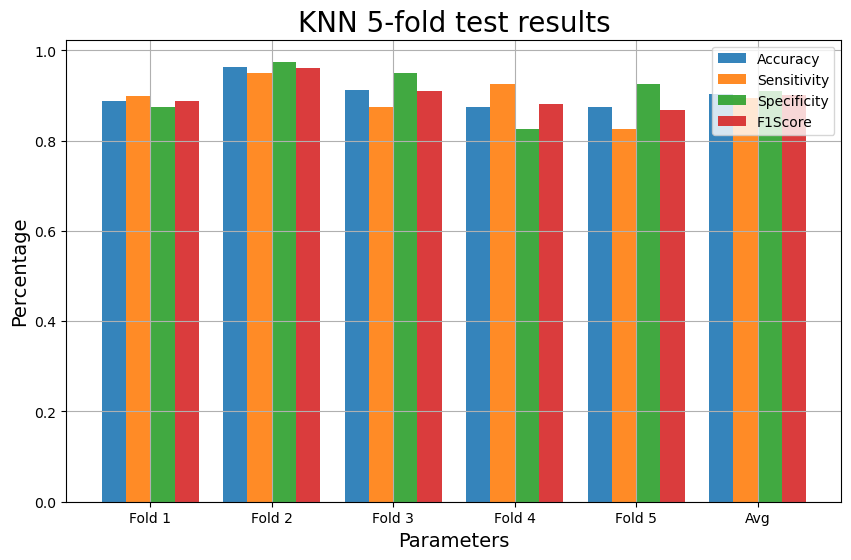

In [101]:
#bar chart for informations
index=np.arange(6)
bar_width=.2

plt.figure(figsize=(10, 6))
k1=plt.bar(index,accuracies,bar_width,alpha=.9,label="Accuracy")
c1=plt.bar(index+bar_width,Sensitivity,bar_width,alpha=.9,label="Sensitivity")
ch1=plt.bar(index+bar_width*2,Specificity,bar_width,alpha=.9,label="Specificity")
f1=plt.bar(index+bar_width*3,F1Score,bar_width,alpha=.9,label="F1Score")

plt.xticks(index+.6/2,('Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Avg'))
plt.ylabel('Percentage',fontsize=14)
plt.xlabel('Parameters',fontsize=14)
plt.title('KNN 5-fold test results',fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

# 5 Fold Cross Validation AdaBoost 

In [102]:

depressed=mood_data[mood_data['specific_disorder']==1]
healthy=mood_data[mood_data['specific_disorder'].isin([0])]


fold_names = []
accuracies = []
Sensitivity = []
Specificity=[]
F1Score=[]
FPRs = []
cohen_kappas = []
auc_scores = []
    
final_ac=0
final_TPR=0  #Sensitivity, recall
final_TNR=0  # Specifity
final_f1Score=0
final_PPV=0  # Precission
final_FPR=0  
final_cohen_score=0
final_auc_score1=0


for i in range(5):
    fr=(i+1)*40
#     if i==4:
#         fr=fr-1
    #print(fr)
    test_depressed = depressed.iloc[i*40:(i+1)*40, :]
    #test_depressed.head()
    train_depressed = depressed[~depressed.isin(test_depressed)].dropna(how = 'all')
    train_depressed
    test_healthy = healthy.iloc[i*(40):40*(i+1), :]
    #print(19*(i+1))
    #test_depressed.head()
    train_healthy = healthy[~healthy.isin(test_healthy)].dropna(how = 'all')
    train_healthy
    train_all=pd.concat([train_depressed,train_healthy])
    test_all=pd.concat([test_depressed,test_healthy])
    y_train=train_all['specific_disorder']
    x_train=train_all.drop('specific_disorder', axis=1)
    y_test=test_all['specific_disorder']
    x_test=test_all.drop('specific_disorder', axis=1)
    x_train_smt = x_train 
    x_test_smt = x_test
    y_train_smt = y_train 
    y_test_smt  = y_test
    
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.metrics import accuracy_score

    modelABC = AdaBoostClassifier(random_state = 96)
    modelABC.fit(x_train_smt, y_train_smt)
    #print(modelABC.score(x_test_smt, y_test_smt))

    # Predicting the Test set results
    y_pred = modelABC.predict(x_test_smt)
    ac = accuracy_score(y_test_smt, y_pred)
    print(ac)
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    y_pred = modelABC.predict(x_test_smt)
    
    from sklearn.metrics import cohen_kappa_score
    cmABC = confusion_matrix(y_test_smt, modelABC.predict(x_test_smt))
    
    TP = cmABC[1,1]  
    TN = cmABC[0,0] 
    FP = cmABC[0,1] 
    FN = cmABC[1,0] 
    
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/float(TP+FN)
    # Specificity or true negative rate
    TNR = TN/float(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/float(TP+FP)
    # Negative predictive value
    NPV = TN/float(TN+FN)
    # Fall out or false positive rate
    FPR = FP/float(FP+TN)
    # False negative rate
    FNR = FN/float(TP+FN)
    # False discovery rate
    FDR = FP/float(TP+FP)
    # Accuracy
    totalABC = sum(sum(cmABC))
    Accuracy = (TN+TP)/totalABC

    # MCC
    val = (TP * TN) - (FP * FN)
    MCC_ABC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

    # Cohen Kappa
    Y_pred = modelABC.predict(x_test_smt)
    cohen_score = cohen_kappa_score(y_test_smt, Y_pred)
    
    from sklearn.metrics import roc_auc_score
    # predict probabilities
    pred_prob1 = modelABC.predict_proba(x_test_smt)
    pred_prob2 = modelABC.predict_proba(x_test_smt)

    # auc scores
    auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
    auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])
    
    
    foldNo="fold "+str(i+1)
    final_ac=final_ac+ac
    final_TPR=final_TPR+TPR
    final_TNR=final_TNR+TNR
    final_FPR=final_FPR+FPR
    final_cohen_score=final_cohen_score+cohen_score
    final_auc_score1=final_auc_score1+auc_score1
    f1Score=2*(TPR*PPV)/(TPR+PPV)
    final_f1Score=final_f1Score+f1Score
    fold_names.append(foldNo)
    accuracies.append(ac)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    F1Score.append(f1Score)
    FPRs.append(FPR)
    cohen_kappas.append(cohen_score)
    auc_scores.append(auc_score1)
    
final_ac=final_ac/5.0
final_TPR=final_TPR/5.0
final_TNR=final_TNR/5.0
final_f1Score=final_f1Score/5.0
final_FPR=final_FPR/5.0
final_cohen_score=final_cohen_score/5.0
final_auc_score1=final_auc_score1/5.0

foldNo="average"
fold_names.append(foldNo)
accuracies.append(final_ac)
Sensitivity.append(final_TPR)
Specificity.append(final_TNR)
F1Score.append(final_f1Score)
FPRs.append(final_FPR)
cohen_kappas.append(final_cohen_score)
auc_scores.append(final_auc_score1)


Performance_Matrix = {
    "AdaBoost": fold_names,
    "Accuracy": accuracies,
    "Sensitivity": Sensitivity,
    "Specificity": Specificity,
    "F1-Score": F1Score,
    "FPR": FPRs,
    #"Cohen's Kappa": cohen_kappas,
   # "AUC": auc_scores
    # Add more key-value pairs for other metrics if needed
}


Performance_Matrix = pd.DataFrame(Performance_Matrix)
Performance_Matrix


0.825
0.775
0.85
0.8125
0.8125


AdaBoost  Accuracy  Sensitivity  Specificity  F1-Score    FPR
0   fold 1    0.8250        0.825        0.825  0.825000  0.175
1   fold 2    0.7750        0.900        0.650  0.800000  0.350
2   fold 3    0.8500        0.850        0.850  0.850000  0.150
3   fold 4    0.8125        0.875        0.750  0.823529  0.250
4   fold 5    0.8125        0.750        0.875  0.800000  0.125
5  average    0.8150        0.840        0.790  0.819706  0.210

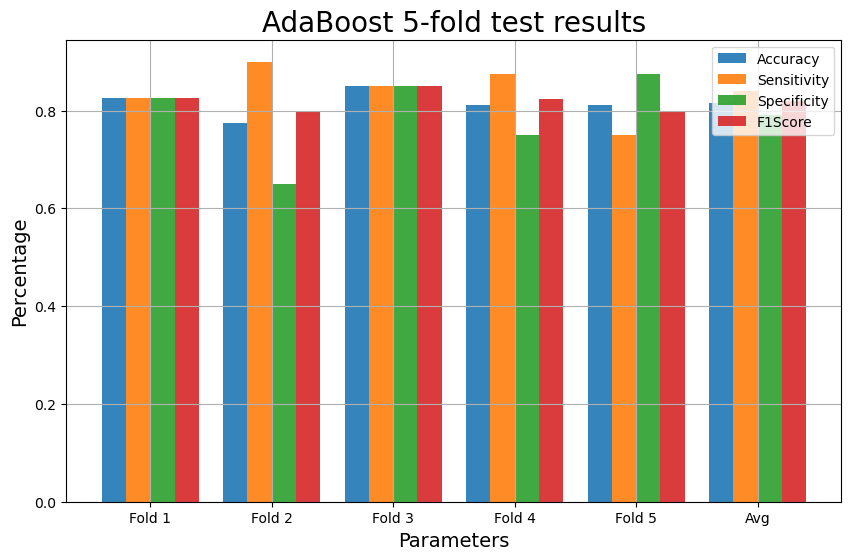

In [103]:
#bar chart for informations
index=np.arange(6)
bar_width=.2

plt.figure(figsize=(10, 6))
k1=plt.bar(index,accuracies,bar_width,alpha=.9,label="Accuracy")
c1=plt.bar(index+bar_width,Sensitivity,bar_width,alpha=.9,label="Sensitivity")
ch1=plt.bar(index+bar_width*2,Specificity,bar_width,alpha=.9,label="Specificity")
f1=plt.bar(index+bar_width*3,F1Score,bar_width,alpha=.9,label="F1Score")

plt.xticks(index+.6/2,('Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Avg'))
plt.ylabel('Percentage',fontsize=14)
plt.xlabel('Parameters',fontsize=14)
plt.title('AdaBoost 5-fold test results',fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

# 5 Fold Cross Validation XGBoost

In [104]:

depressed=mood_data[mood_data['specific_disorder']==1]
healthy=mood_data[mood_data['specific_disorder'].isin([0])]

fold_names = []
accuracies = []
Sensitivity = []
Specificity=[]
F1Score=[]
FPRs = []
cohen_kappas = []
auc_scores = []
    
final_ac=0
final_TPR=0  #Sensitivity, recall
final_TNR=0  # Specifity
final_f1Score=0
final_PPV=0  # Precission
final_FPR=0  
final_cohen_score=0
final_auc_score1=0


for i in range(5):
    fr=(i+1)*40
#     if i==4:
#         fr=fr-1
    #print(fr)
    test_depressed = depressed.iloc[i*40:(i+1)*40, :]
    #test_depressed.head()
    train_depressed = depressed[~depressed.isin(test_depressed)].dropna(how = 'all')
    train_depressed
    test_healthy = healthy.iloc[i*(40):40*(i+1), :]
    #print(19*(i+1))
    #test_depressed.head()
    train_healthy = healthy[~healthy.isin(test_healthy)].dropna(how = 'all')
    train_healthy
    train_all=pd.concat([train_depressed,train_healthy])
    test_all=pd.concat([test_depressed,test_healthy])
    y_train=train_all['specific_disorder']
    x_train=train_all.drop('specific_disorder', axis=1)
    y_test=test_all['specific_disorder']
    x_test=test_all.drop('specific_disorder', axis=1)
    x_train_smt = x_train 
    x_test_smt = x_test
    y_train_smt = y_train 
    y_test_smt  = y_test
    
    # Training the Naive Bayes model on the Training set
    #conda install -c anaconda py-xgboost
    #!pip install xgboost
    import xgboost as xgb
    from sklearn.metrics import accuracy_score

    modelXGB = xgb.XGBClassifier()

    modelXGB.fit(x_train_smt, y_train_smt)
    #print('Training',modelXGB.score(x_train_smt, y_train_smt))
    # Predicting the Test set results
    y_pred = modelXGB.predict(x_test_smt)
    ac = accuracy_score(y_test_smt, y_pred)
    print('Testing',ac)
    cm = confusion_matrix(y_test_smt, y_pred)
    cm
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    y_pred = modelXGB.predict(x_test_smt)
    
    from sklearn.metrics import cohen_kappa_score
    cmGNB = confusion_matrix(y_test_smt, modelXGB.predict(x_test_smt))
    TP = cmGNB[1,1]  
    TN = cmGNB[0,0] 
    FP = cmGNB[0,1] 
    FN = cmGNB[1,0] 
    
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/float(TP+FN)
    # Specificity or true negative rate
    TNR = TN/float(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/float(TP+FP)
    # Negative predictive value
    NPV = TN/float(TN+FN)
    # Fall out or false positive rate
    FPR = FP/float(FP+TN)
    # False negative rate
    FNR = FN/float(TP+FN)
    # False discovery rate
    FDR = FP/float(TP+FP)
    # Accuracy
    totalGNB=sum(sum(cmGNB))
    Accuracy = (TN+TP)/totalGNB
    # MCC
    val = (TP * TN) - (FP * FN)
    MCC_GNB = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
    # Cohen Kappa
    Y_pred = modelXGB.predict(x_test_smt)
    cohen_score = cohen_kappa_score(y_test_smt, Y_pred)

    from sklearn.metrics import roc_auc_score

    # predict probabilities
    pred_prob1 = modelXGB.predict_proba(x_test_smt)
    pred_prob2 = modelXGB.predict_proba(x_test_smt)

    # auc scores
    auc_score1 = roc_auc_score(y_test_smt, pred_prob1[:,1])
    auc_score2 = roc_auc_score(y_test_smt, pred_prob2[:,1])
    
    foldNo="fold "+str(i+1)
    final_ac=final_ac+ac
    final_TPR=final_TPR+TPR
    final_TNR=final_TNR+TNR
    final_FPR=final_FPR+FPR
    final_cohen_score=final_cohen_score+cohen_score
    final_auc_score1=final_auc_score1+auc_score1
    f1Score=2*(TPR*PPV)/(TPR+PPV)
    final_f1Score=final_f1Score+f1Score
    fold_names.append(foldNo)
    accuracies.append(ac)
    Sensitivity.append(TPR)
    Specificity.append(TNR)
    F1Score.append(f1Score)
    FPRs.append(FPR)
    cohen_kappas.append(cohen_score)
    auc_scores.append(auc_score1)
    
final_ac=final_ac/5.0
final_TPR=final_TPR/5.0
final_TNR=final_TNR/5.0
final_f1Score=final_f1Score/5.0
final_FPR=final_FPR/5.0
final_cohen_score=final_cohen_score/5.0
final_auc_score1=final_auc_score1/5.0

foldNo="average"
fold_names.append(foldNo)
accuracies.append(final_ac)
Sensitivity.append(final_TPR)
Specificity.append(final_TNR)
F1Score.append(final_f1Score)
FPRs.append(final_FPR)
cohen_kappas.append(final_cohen_score)
auc_scores.append(final_auc_score1)


Performance_Matrix = {
    "XGBoost": fold_names,
    "Accuracy": accuracies,
    "Sensitivity": Sensitivity,
    "Specificity": Specificity,
    "F1-Score": F1Score,
    "FPR": FPRs,
    #"Cohen's Kappa": cohen_kappas,
   # "AUC": auc_scores
    # Add more key-value pairs for other metrics if needed
}



Performance_Matrix = pd.DataFrame(Performance_Matrix)
Performance_Matrix


Testing 0.8875
Testing 0.9625
Testing 0.9125
Testing 0.875
Testing 0.875


XGBoost  Accuracy  Sensitivity  Specificity  F1-Score    FPR
0   fold 1    0.8875        0.900        0.875  0.888889  0.125
1   fold 2    0.9625        0.950        0.975  0.962025  0.025
2   fold 3    0.9125        0.875        0.950  0.909091  0.050
3   fold 4    0.8750        0.925        0.825  0.880952  0.175
4   fold 5    0.8750        0.825        0.925  0.868421  0.075
5  average    0.9025        0.895        0.910  0.901876  0.090

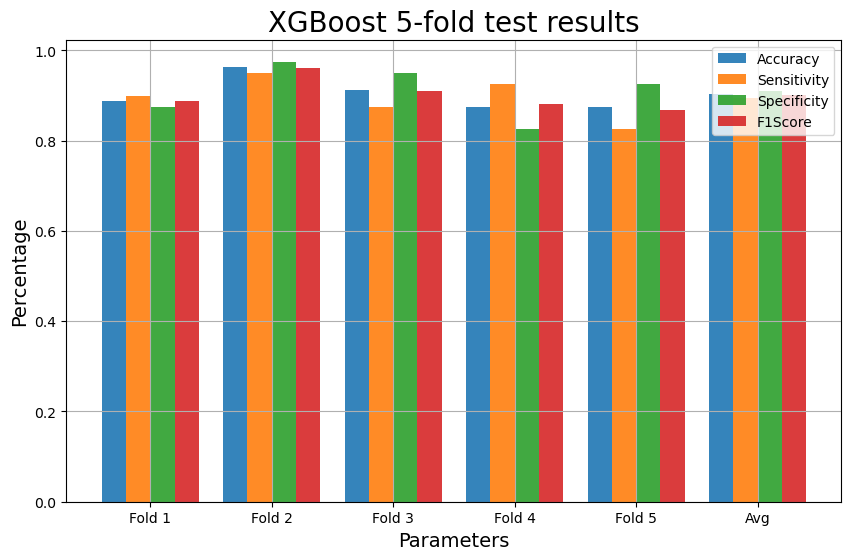

In [105]:
#bar chart for informations
index=np.arange(6)
bar_width=.2

plt.figure(figsize=(10, 6))
k1=plt.bar(index,accuracies,bar_width,alpha=.9,label="Accuracy")
c1=plt.bar(index+bar_width,Sensitivity,bar_width,alpha=.9,label="Sensitivity")
ch1=plt.bar(index+bar_width*2,Specificity,bar_width,alpha=.9,label="Specificity")
f1=plt.bar(index+bar_width*3,F1Score,bar_width,alpha=.9,label="F1Score")

plt.xticks(index+.6/2,('Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Avg'))
plt.ylabel('Percentage',fontsize=14)
plt.xlabel('Parameters',fontsize=14)
plt.title('XGBoost 5-fold test results',fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

In [99]:
#Task 
# accuracy, Sensitivity, Specificity, F1 Score